## Code actionnable 

L'idee du code actionnable est de produire un code sur lequel on puisse appliquer des transformations lineaires simples : rotations, translations, homoteties.

On étudie le melange de deux flux d'information, l'un étant l'identité (invariant selon les poses), l'autre etant l'action (l'information spatiale) appliquee sur l'objet.


en entrée : x uniquement

**Idee principale : l' encodeur produit un code latent selon le principe VAE (dimension 4). 
Ce code latent est "divisé" en 2 composantes (maximalement independants de par la contrainte KL).**


les 2 premieres composantes servent à "agir sur le code" en le translatant. Elles doivent donc selectionner une information spatiale utile à l'encodage de la position.

Les 2 dernieres composantes sont utilisées comme entree d'un classifieur **supervisé**. Elles doivent donc selectionner une information utile à la classification.

La couche intermediaire (dim 256) utile à la classification est ensuite projetee sur un espace de caracteristiques n x 2D. 

la translation est appliquee uniformement à toutes les caracteristiques

validation du code par reconstruction de x en sortie (BCE Loss)

**Necessite de relaxer la contriante KL pour converger** : KL loss * 0.1

In [1]:
%matplotlib inline

In [2]:
from Where_act_code_VAE_classif_alt import init
args = init(verbose=1, epochs=10)
print('Parameters=', args)

Parameters= {'size': 64, 'std': 1.0, 'no_cuda': True, 'momentum': 0.48, 'log_interval': 10, 'test_batch_size': 1, 'valid_size': 0.2, 'verbose': 1, 'batch_size': 50, 'mean': 0.0, 'dimension': 25, 'num_processes': 1, 'lr': 0.001, 'seed': 42, 'epochs': 10}


In [3]:
import numpy as np
import torch

In [4]:
import easydict

## Réseau de neurones

### Lancer l'apprentissage ou charger les données

In [5]:
path = '2018-07-26_actionnable_code_VAE_classif_alt_latent256_KL_0_1.pt'

In [6]:
!ls -l {path}
!rm {path}

ls: impossible d'accéder à '2018-07-26_actionnable_code_VAE_classif_alt_latent256.pt': Aucun fichier ou dossier de ce type
rm: impossible de supprimer '2018-07-26_actionnable_code_VAE_classif_alt_latent256.pt': Aucun fichier ou dossier de ce type


In [7]:
from Where_act_code_VAE_classif_alt import ML
ml = ML(args)

cuda? False


(<matplotlib.figure.Figure at 0x7f1660639a90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1628e1ee80>)

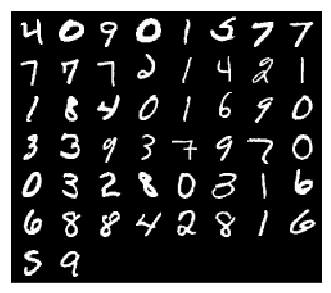

In [8]:
ml.dataset.show()

In [9]:
print(ml.model)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(4, 4), stride=(4, 4))
  (conv2): Conv2d(16, 64, kernel_size=(4, 4), stride=(4, 4))
  (conv3): Conv2d(64, 256, kernel_size=(4, 4), stride=(4, 4))
  (fc_x): Linear(in_features=256, out_features=32, bias=False)
  (fc_mu): Linear(in_features=32, out_features=4, bias=False)
  (fc_logvar): Linear(in_features=32, out_features=4, bias=False)
  (fc_classif_1): Linear(in_features=2, out_features=256, bias=True)
  (fc_classif_2): Linear(in_features=256, out_features=10, bias=False)
  (fc_z_d1): Linear(in_features=256, out_features=32, bias=True)
  (fc_z_d2): Linear(in_features=256, out_features=32, bias=True)
  (deconv3): ConvTranspose2d(256, 64, kernel_size=(4, 4), stride=(4, 4))
  (deconv2): ConvTranspose2d(64, 16, kernel_size=(4, 4), stride=(4, 4))
  (deconv1): ConvTranspose2d(16, 1, kernel_size=(4, 4), stride=(4, 4))
)


In [10]:
ml.args.epochs = 1000

In [11]:
#ml.model.fc_logvar.weight

In [12]:
#ml.model.fc_logvar.weight

In [13]:
#ml.model.fc_mu.weight

In [14]:
#ml.model.fc_mu.weight

In [15]:
ml.train(None)

Train Epoch
	Train Epoch: 1 [0/60000 (0%)]	classif Loss: 147.10	BCE_loss: 2831.53	KL: 0.00	Accuracy: 0.12
	Train Epoch: 1 [500/60000 (1%)]	classif Loss: 150.47	BCE_loss: 1165.96	KL: 2.10	Accuracy: 0.06
	Train Epoch: 1 [1000/60000 (2%)]	classif Loss: 150.49	BCE_loss: 555.59	KL: 1.30	Accuracy: 0.04
	Train Epoch: 1 [1500/60000 (2%)]	classif Loss: 146.76	BCE_loss: 526.91	KL: 0.01	Accuracy: 0.16
	Train Epoch: 1 [2000/60000 (3%)]	classif Loss: 146.93	BCE_loss: 483.50	KL: 0.00	Accuracy: 0.06
	Train Epoch: 1 [2500/60000 (4%)]	classif Loss: 146.82	BCE_loss: 454.80	KL: 0.00	Accuracy: 0.10
	Train Epoch: 1 [3000/60000 (5%)]	classif Loss: 147.50	BCE_loss: 467.04	KL: 0.00	Accuracy: 0.08
	Train Epoch: 1 [3500/60000 (6%)]	classif Loss: 146.88	BCE_loss: 428.65	KL: 0.00	Accuracy: 0.10
	Train Epoch: 1 [4000/60000 (7%)]	classif Loss: 146.90	BCE_loss: 451.53	KL: 0.00	Accuracy: 0.12
	Train Epoch: 1 [4500/60000 (8%)]	classif Loss: 148.96	BCE_loss: 423.95	KL: 0.01	Accuracy: 0.10
	Train Epoch: 1 [5000/60000 (8

	Train Epoch: 1 [42000/60000 (70%)]	classif Loss: 123.71	BCE_loss: 303.30	KL: 23.17	Accuracy: 0.22
	Train Epoch: 1 [42500/60000 (71%)]	classif Loss: 125.22	BCE_loss: 314.13	KL: 22.29	Accuracy: 0.24
	Train Epoch: 1 [43000/60000 (72%)]	classif Loss: 118.48	BCE_loss: 313.13	KL: 22.98	Accuracy: 0.20
	Train Epoch: 1 [43500/60000 (72%)]	classif Loss: 135.26	BCE_loss: 302.08	KL: 24.18	Accuracy: 0.20
	Train Epoch: 1 [44000/60000 (73%)]	classif Loss: 120.28	BCE_loss: 307.23	KL: 24.70	Accuracy: 0.26
	Train Epoch: 1 [44500/60000 (74%)]	classif Loss: 119.27	BCE_loss: 297.31	KL: 22.87	Accuracy: 0.26
	Train Epoch: 1 [45000/60000 (75%)]	classif Loss: 124.70	BCE_loss: 308.77	KL: 24.45	Accuracy: 0.32
	Train Epoch: 1 [45500/60000 (76%)]	classif Loss: 127.35	BCE_loss: 302.62	KL: 23.46	Accuracy: 0.16
	Train Epoch: 1 [46000/60000 (77%)]	classif Loss: 131.11	BCE_loss: 275.84	KL: 24.32	Accuracy: 0.20
	Train Epoch: 1 [46500/60000 (78%)]	classif Loss: 131.44	BCE_loss: 312.01	KL: 24.76	Accuracy: 0.28
	Train Epo

	Train Epoch: 2 [24000/60000 (40%)]	classif Loss: 104.45	BCE_loss: 256.58	KL: 27.66	Accuracy: 0.26
	Train Epoch: 2 [24500/60000 (41%)]	classif Loss: 105.91	BCE_loss: 257.34	KL: 29.46	Accuracy: 0.30
	Train Epoch: 2 [25000/60000 (42%)]	classif Loss: 99.91	BCE_loss: 279.05	KL: 30.06	Accuracy: 0.22
	Train Epoch: 2 [25500/60000 (42%)]	classif Loss: 109.51	BCE_loss: 256.08	KL: 28.36	Accuracy: 0.32
	Train Epoch: 2 [26000/60000 (43%)]	classif Loss: 107.79	BCE_loss: 262.17	KL: 27.86	Accuracy: 0.26
	Train Epoch: 2 [26500/60000 (44%)]	classif Loss: 119.81	BCE_loss: 262.83	KL: 30.52	Accuracy: 0.18
	Train Epoch: 2 [27000/60000 (45%)]	classif Loss: 114.16	BCE_loss: 288.10	KL: 28.91	Accuracy: 0.32
	Train Epoch: 2 [27500/60000 (46%)]	classif Loss: 105.99	BCE_loss: 265.67	KL: 28.89	Accuracy: 0.30
	Train Epoch: 2 [28000/60000 (47%)]	classif Loss: 109.04	BCE_loss: 283.93	KL: 30.24	Accuracy: 0.24
	Train Epoch: 2 [28500/60000 (48%)]	classif Loss: 110.76	BCE_loss: 258.99	KL: 27.91	Accuracy: 0.20
	Train Epoc

	Train Epoch: 3 [6000/60000 (10%)]	classif Loss: 98.97	BCE_loss: 261.70	KL: 29.56	Accuracy: 0.32
	Train Epoch: 3 [6500/60000 (11%)]	classif Loss: 105.78	BCE_loss: 261.15	KL: 31.35	Accuracy: 0.28
	Train Epoch: 3 [7000/60000 (12%)]	classif Loss: 98.16	BCE_loss: 254.41	KL: 32.73	Accuracy: 0.28
	Train Epoch: 3 [7500/60000 (12%)]	classif Loss: 95.23	BCE_loss: 247.05	KL: 33.05	Accuracy: 0.32
	Train Epoch: 3 [8000/60000 (13%)]	classif Loss: 102.49	BCE_loss: 279.08	KL: 31.20	Accuracy: 0.22
	Train Epoch: 3 [8500/60000 (14%)]	classif Loss: 90.45	BCE_loss: 265.70	KL: 30.49	Accuracy: 0.40
	Train Epoch: 3 [9000/60000 (15%)]	classif Loss: 99.88	BCE_loss: 266.03	KL: 28.61	Accuracy: 0.34
	Train Epoch: 3 [9500/60000 (16%)]	classif Loss: 97.16	BCE_loss: 267.36	KL: 30.75	Accuracy: 0.44
	Train Epoch: 3 [10000/60000 (17%)]	classif Loss: 96.65	BCE_loss: 257.86	KL: 31.25	Accuracy: 0.42
	Train Epoch: 3 [10500/60000 (18%)]	classif Loss: 96.06	BCE_loss: 259.75	KL: 31.34	Accuracy: 0.34
	Train Epoch: 3 [11000/600

	Train Epoch: 3 [48000/60000 (80%)]	classif Loss: 96.55	BCE_loss: 242.34	KL: 31.83	Accuracy: 0.34
	Train Epoch: 3 [48500/60000 (81%)]	classif Loss: 100.91	BCE_loss: 254.07	KL: 31.34	Accuracy: 0.36
	Train Epoch: 3 [49000/60000 (82%)]	classif Loss: 101.33	BCE_loss: 241.17	KL: 32.55	Accuracy: 0.36
	Train Epoch: 3 [49500/60000 (82%)]	classif Loss: 105.70	BCE_loss: 227.95	KL: 32.19	Accuracy: 0.42
	Train Epoch: 3 [50000/60000 (83%)]	classif Loss: 90.79	BCE_loss: 227.62	KL: 31.00	Accuracy: 0.26
	Train Epoch: 3 [50500/60000 (84%)]	classif Loss: 87.85	BCE_loss: 239.53	KL: 34.05	Accuracy: 0.36
	Train Epoch: 3 [51000/60000 (85%)]	classif Loss: 95.92	BCE_loss: 233.58	KL: 32.84	Accuracy: 0.36
	Train Epoch: 3 [51500/60000 (86%)]	classif Loss: 93.28	BCE_loss: 248.24	KL: 34.09	Accuracy: 0.34
	Train Epoch: 3 [52000/60000 (87%)]	classif Loss: 94.47	BCE_loss: 250.26	KL: 31.52	Accuracy: 0.44
	Train Epoch: 3 [52500/60000 (88%)]	classif Loss: 99.99	BCE_loss: 244.56	KL: 33.96	Accuracy: 0.44
	Train Epoch: 3 [

	Train Epoch: 4 [30000/60000 (50%)]	classif Loss: 94.12	BCE_loss: 244.29	KL: 33.67	Accuracy: 0.42
	Train Epoch: 4 [30500/60000 (51%)]	classif Loss: 73.76	BCE_loss: 227.55	KL: 35.07	Accuracy: 0.52
	Train Epoch: 4 [31000/60000 (52%)]	classif Loss: 83.61	BCE_loss: 227.84	KL: 34.54	Accuracy: 0.40
	Train Epoch: 4 [31500/60000 (52%)]	classif Loss: 73.10	BCE_loss: 230.95	KL: 33.94	Accuracy: 0.54
	Train Epoch: 4 [32000/60000 (53%)]	classif Loss: 99.82	BCE_loss: 232.78	KL: 32.26	Accuracy: 0.38
	Train Epoch: 4 [32500/60000 (54%)]	classif Loss: 108.52	BCE_loss: 237.64	KL: 36.53	Accuracy: 0.34
	Train Epoch: 4 [33000/60000 (55%)]	classif Loss: 90.94	BCE_loss: 247.22	KL: 35.27	Accuracy: 0.34
	Train Epoch: 4 [33500/60000 (56%)]	classif Loss: 85.26	BCE_loss: 241.93	KL: 31.90	Accuracy: 0.48
	Train Epoch: 4 [34000/60000 (57%)]	classif Loss: 89.97	BCE_loss: 232.78	KL: 35.34	Accuracy: 0.36
	Train Epoch: 4 [34500/60000 (58%)]	classif Loss: 94.08	BCE_loss: 240.46	KL: 32.94	Accuracy: 0.36
	Train Epoch: 4 [35

	Train Epoch: 5 [12000/60000 (20%)]	classif Loss: 84.88	BCE_loss: 230.30	KL: 35.02	Accuracy: 0.40
	Train Epoch: 5 [12500/60000 (21%)]	classif Loss: 66.72	BCE_loss: 236.27	KL: 37.29	Accuracy: 0.56
	Train Epoch: 5 [13000/60000 (22%)]	classif Loss: 87.61	BCE_loss: 240.69	KL: 36.60	Accuracy: 0.40
	Train Epoch: 5 [13500/60000 (22%)]	classif Loss: 82.30	BCE_loss: 227.57	KL: 35.09	Accuracy: 0.44
	Train Epoch: 5 [14000/60000 (23%)]	classif Loss: 81.35	BCE_loss: 237.64	KL: 35.08	Accuracy: 0.38
	Train Epoch: 5 [14500/60000 (24%)]	classif Loss: 90.17	BCE_loss: 239.96	KL: 37.28	Accuracy: 0.50
	Train Epoch: 5 [15000/60000 (25%)]	classif Loss: 92.80	BCE_loss: 236.47	KL: 36.23	Accuracy: 0.40
	Train Epoch: 5 [15500/60000 (26%)]	classif Loss: 86.34	BCE_loss: 236.67	KL: 35.64	Accuracy: 0.46
	Train Epoch: 5 [16000/60000 (27%)]	classif Loss: 75.37	BCE_loss: 228.47	KL: 37.01	Accuracy: 0.54
	Train Epoch: 5 [16500/60000 (28%)]	classif Loss: 83.48	BCE_loss: 224.31	KL: 34.72	Accuracy: 0.52
	Train Epoch: 5 [170

	Train Epoch: 5 [54000/60000 (90%)]	classif Loss: 68.97	BCE_loss: 224.32	KL: 37.88	Accuracy: 0.56
	Train Epoch: 5 [54500/60000 (91%)]	classif Loss: 81.85	BCE_loss: 236.01	KL: 34.79	Accuracy: 0.44
	Train Epoch: 5 [55000/60000 (92%)]	classif Loss: 75.73	BCE_loss: 221.41	KL: 34.11	Accuracy: 0.58
	Train Epoch: 5 [55500/60000 (92%)]	classif Loss: 80.48	BCE_loss: 234.61	KL: 35.50	Accuracy: 0.46
	Train Epoch: 5 [56000/60000 (93%)]	classif Loss: 95.43	BCE_loss: 229.36	KL: 35.65	Accuracy: 0.38
	Train Epoch: 5 [56500/60000 (94%)]	classif Loss: 82.70	BCE_loss: 221.77	KL: 34.81	Accuracy: 0.40
	Train Epoch: 5 [57000/60000 (95%)]	classif Loss: 79.01	BCE_loss: 233.15	KL: 35.67	Accuracy: 0.44
	Train Epoch: 5 [57500/60000 (96%)]	classif Loss: 99.76	BCE_loss: 224.71	KL: 36.56	Accuracy: 0.38
	Train Epoch: 5 [58000/60000 (97%)]	classif Loss: 79.71	BCE_loss: 226.98	KL: 36.22	Accuracy: 0.56
	Train Epoch: 5 [58500/60000 (98%)]	classif Loss: 80.46	BCE_loss: 215.94	KL: 35.23	Accuracy: 0.46
	Train Epoch: 5 [590

	Train Epoch: 6 [36000/60000 (60%)]	classif Loss: 102.49	BCE_loss: 216.61	KL: 36.74	Accuracy: 0.34
	Train Epoch: 6 [36500/60000 (61%)]	classif Loss: 72.14	BCE_loss: 213.56	KL: 34.99	Accuracy: 0.54
	Train Epoch: 6 [37000/60000 (62%)]	classif Loss: 84.85	BCE_loss: 235.48	KL: 39.58	Accuracy: 0.44
	Train Epoch: 6 [37500/60000 (62%)]	classif Loss: 72.23	BCE_loss: 219.51	KL: 35.16	Accuracy: 0.60
	Train Epoch: 6 [38000/60000 (63%)]	classif Loss: 70.37	BCE_loss: 220.59	KL: 37.72	Accuracy: 0.50
	Train Epoch: 6 [38500/60000 (64%)]	classif Loss: 84.68	BCE_loss: 224.59	KL: 37.98	Accuracy: 0.50
	Train Epoch: 6 [39000/60000 (65%)]	classif Loss: 71.18	BCE_loss: 220.99	KL: 35.75	Accuracy: 0.60
	Train Epoch: 6 [39500/60000 (66%)]	classif Loss: 63.22	BCE_loss: 217.91	KL: 33.57	Accuracy: 0.58
	Train Epoch: 6 [40000/60000 (67%)]	classif Loss: 94.89	BCE_loss: 230.72	KL: 36.46	Accuracy: 0.42
	Train Epoch: 6 [40500/60000 (68%)]	classif Loss: 84.66	BCE_loss: 219.70	KL: 36.28	Accuracy: 0.44
	Train Epoch: 6 [41

	Train Epoch: 7 [18000/60000 (30%)]	classif Loss: 77.59	BCE_loss: 220.15	KL: 34.61	Accuracy: 0.48
	Train Epoch: 7 [18500/60000 (31%)]	classif Loss: 82.56	BCE_loss: 222.55	KL: 35.58	Accuracy: 0.60
	Train Epoch: 7 [19000/60000 (32%)]	classif Loss: 86.88	BCE_loss: 224.86	KL: 37.67	Accuracy: 0.42
	Train Epoch: 7 [19500/60000 (32%)]	classif Loss: 69.96	BCE_loss: 209.77	KL: 39.11	Accuracy: 0.62
	Train Epoch: 7 [20000/60000 (33%)]	classif Loss: 69.74	BCE_loss: 243.79	KL: 37.41	Accuracy: 0.56
	Train Epoch: 7 [20500/60000 (34%)]	classif Loss: 68.88	BCE_loss: 232.26	KL: 38.26	Accuracy: 0.54
	Train Epoch: 7 [21000/60000 (35%)]	classif Loss: 70.85	BCE_loss: 226.56	KL: 37.40	Accuracy: 0.50
	Train Epoch: 7 [21500/60000 (36%)]	classif Loss: 90.94	BCE_loss: 227.36	KL: 35.99	Accuracy: 0.32
	Train Epoch: 7 [22000/60000 (37%)]	classif Loss: 76.05	BCE_loss: 240.05	KL: 37.52	Accuracy: 0.50
	Train Epoch: 7 [22500/60000 (38%)]	classif Loss: 90.69	BCE_loss: 225.64	KL: 36.74	Accuracy: 0.52
	Train Epoch: 7 [230

	Train Epoch: 8 [0/60000 (0%)]	classif Loss: 82.38	BCE_loss: 259.33	KL: 40.00	Accuracy: 0.50
	Train Epoch: 8 [500/60000 (1%)]	classif Loss: 58.49	BCE_loss: 220.78	KL: 38.82	Accuracy: 0.50
	Train Epoch: 8 [1000/60000 (2%)]	classif Loss: 48.86	BCE_loss: 210.76	KL: 38.47	Accuracy: 0.72
	Train Epoch: 8 [1500/60000 (2%)]	classif Loss: 63.37	BCE_loss: 231.11	KL: 35.39	Accuracy: 0.74
	Train Epoch: 8 [2000/60000 (3%)]	classif Loss: 89.20	BCE_loss: 229.14	KL: 36.42	Accuracy: 0.44
	Train Epoch: 8 [2500/60000 (4%)]	classif Loss: 72.23	BCE_loss: 212.78	KL: 37.64	Accuracy: 0.54
	Train Epoch: 8 [3000/60000 (5%)]	classif Loss: 74.41	BCE_loss: 231.84	KL: 38.88	Accuracy: 0.48
	Train Epoch: 8 [3500/60000 (6%)]	classif Loss: 68.20	BCE_loss: 222.20	KL: 37.00	Accuracy: 0.52
	Train Epoch: 8 [4000/60000 (7%)]	classif Loss: 84.66	BCE_loss: 219.05	KL: 37.43	Accuracy: 0.46
	Train Epoch: 8 [4500/60000 (8%)]	classif Loss: 65.62	BCE_loss: 209.98	KL: 37.89	Accuracy: 0.60
	Train Epoch: 8 [5000/60000 (8%)]	classif Lo

	Train Epoch: 8 [42000/60000 (70%)]	classif Loss: 65.00	BCE_loss: 221.58	KL: 37.96	Accuracy: 0.48
	Train Epoch: 8 [42500/60000 (71%)]	classif Loss: 75.02	BCE_loss: 216.68	KL: 39.88	Accuracy: 0.54
	Train Epoch: 8 [43000/60000 (72%)]	classif Loss: 73.52	BCE_loss: 211.40	KL: 36.91	Accuracy: 0.50
	Train Epoch: 8 [43500/60000 (72%)]	classif Loss: 75.50	BCE_loss: 220.84	KL: 37.63	Accuracy: 0.52
	Train Epoch: 8 [44000/60000 (73%)]	classif Loss: 67.53	BCE_loss: 215.49	KL: 37.82	Accuracy: 0.54
	Train Epoch: 8 [44500/60000 (74%)]	classif Loss: 80.98	BCE_loss: 219.35	KL: 38.31	Accuracy: 0.52
	Train Epoch: 8 [45000/60000 (75%)]	classif Loss: 56.04	BCE_loss: 229.74	KL: 36.51	Accuracy: 0.72
	Train Epoch: 8 [45500/60000 (76%)]	classif Loss: 67.80	BCE_loss: 225.77	KL: 39.08	Accuracy: 0.54
	Train Epoch: 8 [46000/60000 (77%)]	classif Loss: 64.96	BCE_loss: 235.87	KL: 38.28	Accuracy: 0.64
	Train Epoch: 8 [46500/60000 (78%)]	classif Loss: 91.61	BCE_loss: 222.94	KL: 38.84	Accuracy: 0.44
	Train Epoch: 8 [470

	Train Epoch: 9 [24000/60000 (40%)]	classif Loss: 67.41	BCE_loss: 227.89	KL: 37.36	Accuracy: 0.58
	Train Epoch: 9 [24500/60000 (41%)]	classif Loss: 72.32	BCE_loss: 218.77	KL: 39.66	Accuracy: 0.58
	Train Epoch: 9 [25000/60000 (42%)]	classif Loss: 57.78	BCE_loss: 213.29	KL: 40.45	Accuracy: 0.64
	Train Epoch: 9 [25500/60000 (42%)]	classif Loss: 75.83	BCE_loss: 221.98	KL: 39.44	Accuracy: 0.50
	Train Epoch: 9 [26000/60000 (43%)]	classif Loss: 75.88	BCE_loss: 213.09	KL: 35.52	Accuracy: 0.56
	Train Epoch: 9 [26500/60000 (44%)]	classif Loss: 79.93	BCE_loss: 247.31	KL: 38.97	Accuracy: 0.50
	Train Epoch: 9 [27000/60000 (45%)]	classif Loss: 65.25	BCE_loss: 211.48	KL: 38.10	Accuracy: 0.56
	Train Epoch: 9 [27500/60000 (46%)]	classif Loss: 72.84	BCE_loss: 214.79	KL: 37.45	Accuracy: 0.42
	Train Epoch: 9 [28000/60000 (47%)]	classif Loss: 67.82	BCE_loss: 215.83	KL: 38.33	Accuracy: 0.60
	Train Epoch: 9 [28500/60000 (48%)]	classif Loss: 69.56	BCE_loss: 211.42	KL: 38.13	Accuracy: 0.56
	Train Epoch: 9 [290

	Train Epoch: 10 [6000/60000 (10%)]	classif Loss: 76.83	BCE_loss: 209.92	KL: 40.34	Accuracy: 0.56
	Train Epoch: 10 [6500/60000 (11%)]	classif Loss: 54.50	BCE_loss: 226.22	KL: 40.25	Accuracy: 0.60
	Train Epoch: 10 [7000/60000 (12%)]	classif Loss: 67.90	BCE_loss: 230.44	KL: 38.99	Accuracy: 0.64
	Train Epoch: 10 [7500/60000 (12%)]	classif Loss: 67.86	BCE_loss: 223.99	KL: 40.97	Accuracy: 0.46
	Train Epoch: 10 [8000/60000 (13%)]	classif Loss: 64.27	BCE_loss: 219.78	KL: 39.14	Accuracy: 0.54
	Train Epoch: 10 [8500/60000 (14%)]	classif Loss: 81.40	BCE_loss: 222.66	KL: 38.56	Accuracy: 0.44
	Train Epoch: 10 [9000/60000 (15%)]	classif Loss: 71.09	BCE_loss: 216.71	KL: 40.56	Accuracy: 0.64
	Train Epoch: 10 [9500/60000 (16%)]	classif Loss: 73.70	BCE_loss: 222.38	KL: 39.44	Accuracy: 0.50
	Train Epoch: 10 [10000/60000 (17%)]	classif Loss: 56.99	BCE_loss: 209.01	KL: 39.46	Accuracy: 0.62
	Train Epoch: 10 [10500/60000 (18%)]	classif Loss: 62.43	BCE_loss: 215.08	KL: 39.76	Accuracy: 0.50
	Train Epoch: 10 [

	Train Epoch: 10 [47500/60000 (79%)]	classif Loss: 70.59	BCE_loss: 238.84	KL: 42.59	Accuracy: 0.66
	Train Epoch: 10 [48000/60000 (80%)]	classif Loss: 63.65	BCE_loss: 215.51	KL: 40.49	Accuracy: 0.64
	Train Epoch: 10 [48500/60000 (81%)]	classif Loss: 69.50	BCE_loss: 222.03	KL: 41.02	Accuracy: 0.64
	Train Epoch: 10 [49000/60000 (82%)]	classif Loss: 56.49	BCE_loss: 206.43	KL: 40.79	Accuracy: 0.66
	Train Epoch: 10 [49500/60000 (82%)]	classif Loss: 47.88	BCE_loss: 202.16	KL: 42.56	Accuracy: 0.70
	Train Epoch: 10 [50000/60000 (83%)]	classif Loss: 56.64	BCE_loss: 218.66	KL: 42.72	Accuracy: 0.68
	Train Epoch: 10 [50500/60000 (84%)]	classif Loss: 61.73	BCE_loss: 229.09	KL: 43.86	Accuracy: 0.72
	Train Epoch: 10 [51000/60000 (85%)]	classif Loss: 49.05	BCE_loss: 204.60	KL: 42.74	Accuracy: 0.70
	Train Epoch: 10 [51500/60000 (86%)]	classif Loss: 57.93	BCE_loss: 223.83	KL: 44.10	Accuracy: 0.68
	Train Epoch: 10 [52000/60000 (87%)]	classif Loss: 77.63	BCE_loss: 205.19	KL: 40.38	Accuracy: 0.58
	Train Epo

	Train Epoch: 11 [29500/60000 (49%)]	classif Loss: 64.78	BCE_loss: 201.69	KL: 39.88	Accuracy: 0.64
	Train Epoch: 11 [30000/60000 (50%)]	classif Loss: 46.06	BCE_loss: 200.32	KL: 39.91	Accuracy: 0.78
	Train Epoch: 11 [30500/60000 (51%)]	classif Loss: 43.95	BCE_loss: 213.93	KL: 44.20	Accuracy: 0.74
	Train Epoch: 11 [31000/60000 (52%)]	classif Loss: 84.56	BCE_loss: 218.84	KL: 43.07	Accuracy: 0.58
	Train Epoch: 11 [31500/60000 (52%)]	classif Loss: 68.12	BCE_loss: 232.74	KL: 43.25	Accuracy: 0.72
	Train Epoch: 11 [32000/60000 (53%)]	classif Loss: 42.76	BCE_loss: 211.91	KL: 42.49	Accuracy: 0.68
	Train Epoch: 11 [32500/60000 (54%)]	classif Loss: 66.36	BCE_loss: 222.75	KL: 45.74	Accuracy: 0.56
	Train Epoch: 11 [33000/60000 (55%)]	classif Loss: 57.62	BCE_loss: 213.50	KL: 41.09	Accuracy: 0.66
	Train Epoch: 11 [33500/60000 (56%)]	classif Loss: 49.09	BCE_loss: 217.05	KL: 42.31	Accuracy: 0.68
	Train Epoch: 11 [34000/60000 (57%)]	classif Loss: 78.40	BCE_loss: 212.08	KL: 41.23	Accuracy: 0.54
	Train Epo

	Train Epoch: 12 [11500/60000 (19%)]	classif Loss: 56.99	BCE_loss: 222.72	KL: 44.41	Accuracy: 0.66
	Train Epoch: 12 [12000/60000 (20%)]	classif Loss: 50.12	BCE_loss: 197.86	KL: 42.67	Accuracy: 0.66
	Train Epoch: 12 [12500/60000 (21%)]	classif Loss: 45.24	BCE_loss: 209.79	KL: 44.93	Accuracy: 0.70
	Train Epoch: 12 [13000/60000 (22%)]	classif Loss: 34.16	BCE_loss: 199.92	KL: 41.83	Accuracy: 0.80
	Train Epoch: 12 [13500/60000 (22%)]	classif Loss: 65.55	BCE_loss: 214.82	KL: 42.00	Accuracy: 0.64
	Train Epoch: 12 [14000/60000 (23%)]	classif Loss: 67.32	BCE_loss: 226.25	KL: 41.10	Accuracy: 0.64
	Train Epoch: 12 [14500/60000 (24%)]	classif Loss: 53.55	BCE_loss: 224.85	KL: 42.04	Accuracy: 0.68
	Train Epoch: 12 [15000/60000 (25%)]	classif Loss: 69.49	BCE_loss: 232.06	KL: 41.63	Accuracy: 0.56
	Train Epoch: 12 [15500/60000 (26%)]	classif Loss: 54.20	BCE_loss: 224.43	KL: 44.46	Accuracy: 0.68
	Train Epoch: 12 [16000/60000 (27%)]	classif Loss: 55.28	BCE_loss: 227.46	KL: 43.17	Accuracy: 0.64
	Train Epo

	Train Epoch: 12 [53000/60000 (88%)]	classif Loss: 52.51	BCE_loss: 212.21	KL: 41.92	Accuracy: 0.70
	Train Epoch: 12 [53500/60000 (89%)]	classif Loss: 57.18	BCE_loss: 216.50	KL: 43.04	Accuracy: 0.64
	Train Epoch: 12 [54000/60000 (90%)]	classif Loss: 41.93	BCE_loss: 210.58	KL: 44.96	Accuracy: 0.80
	Train Epoch: 12 [54500/60000 (91%)]	classif Loss: 55.62	BCE_loss: 218.63	KL: 44.55	Accuracy: 0.72
	Train Epoch: 12 [55000/60000 (92%)]	classif Loss: 56.34	BCE_loss: 213.88	KL: 43.74	Accuracy: 0.72
	Train Epoch: 12 [55500/60000 (92%)]	classif Loss: 46.12	BCE_loss: 215.58	KL: 48.54	Accuracy: 0.78
	Train Epoch: 12 [56000/60000 (93%)]	classif Loss: 59.43	BCE_loss: 226.28	KL: 42.79	Accuracy: 0.60
	Train Epoch: 12 [56500/60000 (94%)]	classif Loss: 58.61	BCE_loss: 212.53	KL: 44.06	Accuracy: 0.70
	Train Epoch: 12 [57000/60000 (95%)]	classif Loss: 63.02	BCE_loss: 213.35	KL: 41.84	Accuracy: 0.64
	Train Epoch: 12 [57500/60000 (96%)]	classif Loss: 35.75	BCE_loss: 214.49	KL: 44.56	Accuracy: 0.80
	Train Epo

	Train Epoch: 13 [35000/60000 (58%)]	classif Loss: 39.34	BCE_loss: 214.72	KL: 45.17	Accuracy: 0.72
	Train Epoch: 13 [35500/60000 (59%)]	classif Loss: 51.32	BCE_loss: 220.95	KL: 44.95	Accuracy: 0.70
	Train Epoch: 13 [36000/60000 (60%)]	classif Loss: 25.72	BCE_loss: 225.26	KL: 42.28	Accuracy: 0.88
	Train Epoch: 13 [36500/60000 (61%)]	classif Loss: 41.15	BCE_loss: 226.73	KL: 45.19	Accuracy: 0.82
	Train Epoch: 13 [37000/60000 (62%)]	classif Loss: 36.03	BCE_loss: 212.72	KL: 43.93	Accuracy: 0.78
	Train Epoch: 13 [37500/60000 (62%)]	classif Loss: 35.33	BCE_loss: 201.13	KL: 42.21	Accuracy: 0.74
	Train Epoch: 13 [38000/60000 (63%)]	classif Loss: 58.57	BCE_loss: 223.37	KL: 45.29	Accuracy: 0.72
	Train Epoch: 13 [38500/60000 (64%)]	classif Loss: 43.41	BCE_loss: 216.09	KL: 44.35	Accuracy: 0.82
	Train Epoch: 13 [39000/60000 (65%)]	classif Loss: 40.73	BCE_loss: 208.54	KL: 41.49	Accuracy: 0.76
	Train Epoch: 13 [39500/60000 (66%)]	classif Loss: 81.39	BCE_loss: 221.99	KL: 42.61	Accuracy: 0.68
	Train Epo

	Train Epoch: 14 [17000/60000 (28%)]	classif Loss: 30.76	BCE_loss: 208.57	KL: 44.40	Accuracy: 0.80
	Train Epoch: 14 [17500/60000 (29%)]	classif Loss: 47.41	BCE_loss: 227.26	KL: 43.86	Accuracy: 0.70
	Train Epoch: 14 [18000/60000 (30%)]	classif Loss: 46.81	BCE_loss: 211.89	KL: 45.86	Accuracy: 0.74
	Train Epoch: 14 [18500/60000 (31%)]	classif Loss: 27.32	BCE_loss: 217.24	KL: 45.43	Accuracy: 0.88
	Train Epoch: 14 [19000/60000 (32%)]	classif Loss: 49.73	BCE_loss: 209.43	KL: 45.15	Accuracy: 0.68
	Train Epoch: 14 [19500/60000 (32%)]	classif Loss: 33.39	BCE_loss: 210.38	KL: 43.04	Accuracy: 0.86
	Train Epoch: 14 [20000/60000 (33%)]	classif Loss: 35.54	BCE_loss: 220.45	KL: 45.82	Accuracy: 0.80
	Train Epoch: 14 [20500/60000 (34%)]	classif Loss: 38.47	BCE_loss: 214.73	KL: 43.57	Accuracy: 0.78
	Train Epoch: 14 [21000/60000 (35%)]	classif Loss: 34.67	BCE_loss: 212.34	KL: 46.71	Accuracy: 0.78
	Train Epoch: 14 [21500/60000 (36%)]	classif Loss: 42.25	BCE_loss: 214.21	KL: 47.10	Accuracy: 0.78
	Train Epo

	Train Epoch: 14 [58500/60000 (98%)]	classif Loss: 31.93	BCE_loss: 213.16	KL: 43.94	Accuracy: 0.90
	Train Epoch: 14 [59000/60000 (98%)]	classif Loss: 26.99	BCE_loss: 219.73	KL: 44.87	Accuracy: 0.86
	Train Epoch: 14 [59500/60000 (99%)]	classif Loss: 34.64	BCE_loss: 198.64	KL: 45.94	Accuracy: 0.80
	Train Epoch: 15 [0/60000 (0%)]	classif Loss: 34.14	BCE_loss: 210.13	KL: 45.51	Accuracy: 0.78
	Train Epoch: 15 [500/60000 (1%)]	classif Loss: 29.98	BCE_loss: 206.62	KL: 45.35	Accuracy: 0.88
	Train Epoch: 15 [1000/60000 (2%)]	classif Loss: 47.66	BCE_loss: 203.70	KL: 43.87	Accuracy: 0.78
	Train Epoch: 15 [1500/60000 (2%)]	classif Loss: 33.90	BCE_loss: 202.73	KL: 45.57	Accuracy: 0.86
	Train Epoch: 15 [2000/60000 (3%)]	classif Loss: 51.30	BCE_loss: 219.60	KL: 43.16	Accuracy: 0.72
	Train Epoch: 15 [2500/60000 (4%)]	classif Loss: 45.61	BCE_loss: 212.37	KL: 45.44	Accuracy: 0.74
	Train Epoch: 15 [3000/60000 (5%)]	classif Loss: 45.00	BCE_loss: 221.76	KL: 50.17	Accuracy: 0.72
	Train Epoch: 15 [3500/60000

	Train Epoch: 15 [40500/60000 (68%)]	classif Loss: 35.01	BCE_loss: 201.39	KL: 45.05	Accuracy: 0.76
	Train Epoch: 15 [41000/60000 (68%)]	classif Loss: 46.01	BCE_loss: 225.25	KL: 46.95	Accuracy: 0.76
	Train Epoch: 15 [41500/60000 (69%)]	classif Loss: 28.98	BCE_loss: 199.79	KL: 44.97	Accuracy: 0.84
	Train Epoch: 15 [42000/60000 (70%)]	classif Loss: 28.83	BCE_loss: 212.47	KL: 44.37	Accuracy: 0.84
	Train Epoch: 15 [42500/60000 (71%)]	classif Loss: 43.98	BCE_loss: 198.38	KL: 43.60	Accuracy: 0.76
	Train Epoch: 15 [43000/60000 (72%)]	classif Loss: 48.65	BCE_loss: 216.81	KL: 45.63	Accuracy: 0.74
	Train Epoch: 15 [43500/60000 (72%)]	classif Loss: 43.79	BCE_loss: 221.08	KL: 45.25	Accuracy: 0.74
	Train Epoch: 15 [44000/60000 (73%)]	classif Loss: 39.96	BCE_loss: 264.11	KL: 45.59	Accuracy: 0.80
	Train Epoch: 15 [44500/60000 (74%)]	classif Loss: 32.44	BCE_loss: 208.81	KL: 43.47	Accuracy: 0.80
	Train Epoch: 15 [45000/60000 (75%)]	classif Loss: 42.39	BCE_loss: 203.91	KL: 46.25	Accuracy: 0.82
	Train Epo

	Train Epoch: 16 [22500/60000 (38%)]	classif Loss: 49.24	BCE_loss: 202.59	KL: 45.91	Accuracy: 0.68
	Train Epoch: 16 [23000/60000 (38%)]	classif Loss: 36.98	BCE_loss: 202.94	KL: 44.86	Accuracy: 0.76
	Train Epoch: 16 [23500/60000 (39%)]	classif Loss: 56.12	BCE_loss: 211.68	KL: 44.72	Accuracy: 0.72
	Train Epoch: 16 [24000/60000 (40%)]	classif Loss: 30.76	BCE_loss: 205.75	KL: 45.18	Accuracy: 0.86
	Train Epoch: 16 [24500/60000 (41%)]	classif Loss: 35.95	BCE_loss: 228.22	KL: 46.54	Accuracy: 0.82
	Train Epoch: 16 [25000/60000 (42%)]	classif Loss: 46.09	BCE_loss: 200.92	KL: 46.76	Accuracy: 0.78
	Train Epoch: 16 [25500/60000 (42%)]	classif Loss: 30.34	BCE_loss: 221.94	KL: 44.64	Accuracy: 0.78
	Train Epoch: 16 [26000/60000 (43%)]	classif Loss: 49.73	BCE_loss: 214.41	KL: 44.60	Accuracy: 0.76
	Train Epoch: 16 [26500/60000 (44%)]	classif Loss: 35.59	BCE_loss: 200.71	KL: 46.37	Accuracy: 0.72
	Train Epoch: 16 [27000/60000 (45%)]	classif Loss: 38.33	BCE_loss: 221.18	KL: 44.59	Accuracy: 0.72
	Train Epo

	Train Epoch: 17 [4000/60000 (7%)]	classif Loss: 33.07	BCE_loss: 222.89	KL: 44.57	Accuracy: 0.82
	Train Epoch: 17 [4500/60000 (8%)]	classif Loss: 31.24	BCE_loss: 221.19	KL: 45.53	Accuracy: 0.82
	Train Epoch: 17 [5000/60000 (8%)]	classif Loss: 29.51	BCE_loss: 210.74	KL: 44.54	Accuracy: 0.88
	Train Epoch: 17 [5500/60000 (9%)]	classif Loss: 32.88	BCE_loss: 209.44	KL: 45.08	Accuracy: 0.78
	Train Epoch: 17 [6000/60000 (10%)]	classif Loss: 61.88	BCE_loss: 213.65	KL: 46.94	Accuracy: 0.70
	Train Epoch: 17 [6500/60000 (11%)]	classif Loss: 52.02	BCE_loss: 220.55	KL: 46.20	Accuracy: 0.76
	Train Epoch: 17 [7000/60000 (12%)]	classif Loss: 41.50	BCE_loss: 213.71	KL: 43.95	Accuracy: 0.80
	Train Epoch: 17 [7500/60000 (12%)]	classif Loss: 46.17	BCE_loss: 211.36	KL: 46.58	Accuracy: 0.74
	Train Epoch: 17 [8000/60000 (13%)]	classif Loss: 58.45	BCE_loss: 212.40	KL: 44.42	Accuracy: 0.70
	Train Epoch: 17 [8500/60000 (14%)]	classif Loss: 44.06	BCE_loss: 217.82	KL: 45.71	Accuracy: 0.84
	Train Epoch: 17 [9000/6

	Train Epoch: 17 [45500/60000 (76%)]	classif Loss: 29.68	BCE_loss: 229.39	KL: 45.32	Accuracy: 0.80
	Train Epoch: 17 [46000/60000 (77%)]	classif Loss: 43.76	BCE_loss: 229.66	KL: 46.64	Accuracy: 0.72
	Train Epoch: 17 [46500/60000 (78%)]	classif Loss: 40.75	BCE_loss: 204.29	KL: 45.86	Accuracy: 0.84
	Train Epoch: 17 [47000/60000 (78%)]	classif Loss: 36.51	BCE_loss: 208.75	KL: 47.52	Accuracy: 0.82
	Train Epoch: 17 [47500/60000 (79%)]	classif Loss: 44.03	BCE_loss: 214.69	KL: 45.57	Accuracy: 0.80
	Train Epoch: 17 [48000/60000 (80%)]	classif Loss: 30.25	BCE_loss: 221.10	KL: 44.70	Accuracy: 0.82
	Train Epoch: 17 [48500/60000 (81%)]	classif Loss: 50.72	BCE_loss: 215.66	KL: 45.48	Accuracy: 0.68
	Train Epoch: 17 [49000/60000 (82%)]	classif Loss: 26.24	BCE_loss: 213.94	KL: 45.85	Accuracy: 0.84
	Train Epoch: 17 [49500/60000 (82%)]	classif Loss: 31.98	BCE_loss: 202.01	KL: 45.77	Accuracy: 0.82
	Train Epoch: 17 [50000/60000 (83%)]	classif Loss: 41.20	BCE_loss: 204.29	KL: 44.79	Accuracy: 0.80
	Train Epo

	Train Epoch: 18 [27500/60000 (46%)]	classif Loss: 45.69	BCE_loss: 212.55	KL: 46.89	Accuracy: 0.72
	Train Epoch: 18 [28000/60000 (47%)]	classif Loss: 30.19	BCE_loss: 211.77	KL: 44.39	Accuracy: 0.80
	Train Epoch: 18 [28500/60000 (48%)]	classif Loss: 39.15	BCE_loss: 194.21	KL: 44.72	Accuracy: 0.86
	Train Epoch: 18 [29000/60000 (48%)]	classif Loss: 27.98	BCE_loss: 205.79	KL: 44.82	Accuracy: 0.86
	Train Epoch: 18 [29500/60000 (49%)]	classif Loss: 34.94	BCE_loss: 213.10	KL: 42.91	Accuracy: 0.76
	Train Epoch: 18 [30000/60000 (50%)]	classif Loss: 19.59	BCE_loss: 209.18	KL: 45.00	Accuracy: 0.90
	Train Epoch: 18 [30500/60000 (51%)]	classif Loss: 42.09	BCE_loss: 212.17	KL: 45.29	Accuracy: 0.80
	Train Epoch: 18 [31000/60000 (52%)]	classif Loss: 45.61	BCE_loss: 218.31	KL: 48.33	Accuracy: 0.70
	Train Epoch: 18 [31500/60000 (52%)]	classif Loss: 37.46	BCE_loss: 204.83	KL: 46.28	Accuracy: 0.84
	Train Epoch: 18 [32000/60000 (53%)]	classif Loss: 45.68	BCE_loss: 204.40	KL: 45.76	Accuracy: 0.78
	Train Epo

	Train Epoch: 19 [9500/60000 (16%)]	classif Loss: 39.52	BCE_loss: 199.07	KL: 43.82	Accuracy: 0.74
	Train Epoch: 19 [10000/60000 (17%)]	classif Loss: 31.93	BCE_loss: 201.35	KL: 45.07	Accuracy: 0.86
	Train Epoch: 19 [10500/60000 (18%)]	classif Loss: 29.77	BCE_loss: 207.52	KL: 47.28	Accuracy: 0.82
	Train Epoch: 19 [11000/60000 (18%)]	classif Loss: 39.74	BCE_loss: 218.91	KL: 47.89	Accuracy: 0.76
	Train Epoch: 19 [11500/60000 (19%)]	classif Loss: 33.66	BCE_loss: 209.97	KL: 45.96	Accuracy: 0.88
	Train Epoch: 19 [12000/60000 (20%)]	classif Loss: 22.75	BCE_loss: 210.44	KL: 47.63	Accuracy: 0.94
	Train Epoch: 19 [12500/60000 (21%)]	classif Loss: 28.63	BCE_loss: 214.13	KL: 46.05	Accuracy: 0.88
	Train Epoch: 19 [13000/60000 (22%)]	classif Loss: 34.23	BCE_loss: 204.37	KL: 45.67	Accuracy: 0.82
	Train Epoch: 19 [13500/60000 (22%)]	classif Loss: 40.56	BCE_loss: 208.56	KL: 44.75	Accuracy: 0.72
	Train Epoch: 19 [14000/60000 (23%)]	classif Loss: 35.14	BCE_loss: 197.83	KL: 46.44	Accuracy: 0.82
	Train Epoc

	Train Epoch: 19 [51000/60000 (85%)]	classif Loss: 33.45	BCE_loss: 204.66	KL: 45.26	Accuracy: 0.84
	Train Epoch: 19 [51500/60000 (86%)]	classif Loss: 48.46	BCE_loss: 230.73	KL: 43.49	Accuracy: 0.76
	Train Epoch: 19 [52000/60000 (87%)]	classif Loss: 21.12	BCE_loss: 221.27	KL: 46.55	Accuracy: 0.92
	Train Epoch: 19 [52500/60000 (88%)]	classif Loss: 36.58	BCE_loss: 198.10	KL: 45.36	Accuracy: 0.82
	Train Epoch: 19 [53000/60000 (88%)]	classif Loss: 33.12	BCE_loss: 201.11	KL: 46.93	Accuracy: 0.84
	Train Epoch: 19 [53500/60000 (89%)]	classif Loss: 62.75	BCE_loss: 204.64	KL: 45.96	Accuracy: 0.70
	Train Epoch: 19 [54000/60000 (90%)]	classif Loss: 43.73	BCE_loss: 219.74	KL: 45.80	Accuracy: 0.78
	Train Epoch: 19 [54500/60000 (91%)]	classif Loss: 25.79	BCE_loss: 196.69	KL: 42.64	Accuracy: 0.94
	Train Epoch: 19 [55000/60000 (92%)]	classif Loss: 36.48	BCE_loss: 222.31	KL: 46.30	Accuracy: 0.80
	Train Epoch: 19 [55500/60000 (92%)]	classif Loss: 33.37	BCE_loss: 209.47	KL: 43.12	Accuracy: 0.86
	Train Epo

	Train Epoch: 20 [33000/60000 (55%)]	classif Loss: 26.77	BCE_loss: 204.01	KL: 45.66	Accuracy: 0.88
	Train Epoch: 20 [33500/60000 (56%)]	classif Loss: 32.96	BCE_loss: 209.82	KL: 44.57	Accuracy: 0.84
	Train Epoch: 20 [34000/60000 (57%)]	classif Loss: 31.66	BCE_loss: 239.40	KL: 44.26	Accuracy: 0.80
	Train Epoch: 20 [34500/60000 (58%)]	classif Loss: 25.02	BCE_loss: 217.53	KL: 47.38	Accuracy: 0.82
	Train Epoch: 20 [35000/60000 (58%)]	classif Loss: 33.27	BCE_loss: 212.64	KL: 46.60	Accuracy: 0.80
	Train Epoch: 20 [35500/60000 (59%)]	classif Loss: 46.00	BCE_loss: 220.08	KL: 47.73	Accuracy: 0.70
	Train Epoch: 20 [36000/60000 (60%)]	classif Loss: 34.21	BCE_loss: 202.50	KL: 46.73	Accuracy: 0.84
	Train Epoch: 20 [36500/60000 (61%)]	classif Loss: 20.62	BCE_loss: 199.56	KL: 46.27	Accuracy: 0.88
	Train Epoch: 20 [37000/60000 (62%)]	classif Loss: 35.82	BCE_loss: 203.25	KL: 46.05	Accuracy: 0.82
	Train Epoch: 20 [37500/60000 (62%)]	classif Loss: 30.94	BCE_loss: 203.05	KL: 46.73	Accuracy: 0.84
	Train Epo

	Train Epoch: 21 [15000/60000 (25%)]	classif Loss: 43.58	BCE_loss: 205.45	KL: 45.00	Accuracy: 0.82
	Train Epoch: 21 [15500/60000 (26%)]	classif Loss: 49.33	BCE_loss: 200.68	KL: 47.91	Accuracy: 0.76
	Train Epoch: 21 [16000/60000 (27%)]	classif Loss: 30.08	BCE_loss: 201.78	KL: 46.00	Accuracy: 0.86
	Train Epoch: 21 [16500/60000 (28%)]	classif Loss: 29.00	BCE_loss: 211.18	KL: 46.74	Accuracy: 0.82
	Train Epoch: 21 [17000/60000 (28%)]	classif Loss: 22.45	BCE_loss: 207.65	KL: 44.94	Accuracy: 0.86
	Train Epoch: 21 [17500/60000 (29%)]	classif Loss: 34.23	BCE_loss: 219.11	KL: 44.96	Accuracy: 0.82
	Train Epoch: 21 [18000/60000 (30%)]	classif Loss: 35.37	BCE_loss: 209.86	KL: 45.88	Accuracy: 0.82
	Train Epoch: 21 [18500/60000 (31%)]	classif Loss: 38.99	BCE_loss: 196.92	KL: 48.93	Accuracy: 0.82
	Train Epoch: 21 [19000/60000 (32%)]	classif Loss: 41.28	BCE_loss: 215.79	KL: 44.57	Accuracy: 0.78
	Train Epoch: 21 [19500/60000 (32%)]	classif Loss: 21.66	BCE_loss: 215.24	KL: 44.84	Accuracy: 0.86
	Train Epo

	Train Epoch: 21 [56500/60000 (94%)]	classif Loss: 31.31	BCE_loss: 207.24	KL: 46.22	Accuracy: 0.82
	Train Epoch: 21 [57000/60000 (95%)]	classif Loss: 56.31	BCE_loss: 213.86	KL: 47.92	Accuracy: 0.78
	Train Epoch: 21 [57500/60000 (96%)]	classif Loss: 25.36	BCE_loss: 205.33	KL: 45.92	Accuracy: 0.90
	Train Epoch: 21 [58000/60000 (97%)]	classif Loss: 30.81	BCE_loss: 217.41	KL: 46.34	Accuracy: 0.82
	Train Epoch: 21 [58500/60000 (98%)]	classif Loss: 28.49	BCE_loss: 211.21	KL: 47.48	Accuracy: 0.86
	Train Epoch: 21 [59000/60000 (98%)]	classif Loss: 28.64	BCE_loss: 215.81	KL: 46.46	Accuracy: 0.84
	Train Epoch: 21 [59500/60000 (99%)]	classif Loss: 26.78	BCE_loss: 216.92	KL: 43.96	Accuracy: 0.84
	Train Epoch: 22 [0/60000 (0%)]	classif Loss: 29.62	BCE_loss: 213.26	KL: 44.69	Accuracy: 0.82
	Train Epoch: 22 [500/60000 (1%)]	classif Loss: 31.77	BCE_loss: 193.01	KL: 42.68	Accuracy: 0.84
	Train Epoch: 22 [1000/60000 (2%)]	classif Loss: 37.09	BCE_loss: 213.08	KL: 46.16	Accuracy: 0.82
	Train Epoch: 22 [15

Process Process-23:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


KeyboardInterrupt: 

In [17]:
ml.train(None)

Train Epoch
	Train Epoch: 1 [0/60000 (0%)]	classif Loss: 64.24	BCE_loss: 207.24	KL: 45.09	Accuracy: 0.66
	Train Epoch: 1 [500/60000 (1%)]	classif Loss: 19.72	BCE_loss: 213.51	KL: 45.19	Accuracy: 0.90
	Train Epoch: 1 [1000/60000 (2%)]	classif Loss: 41.27	BCE_loss: 217.27	KL: 45.40	Accuracy: 0.76
	Train Epoch: 1 [1500/60000 (2%)]	classif Loss: 26.44	BCE_loss: 202.82	KL: 44.02	Accuracy: 0.86
	Train Epoch: 1 [2000/60000 (3%)]	classif Loss: 15.14	BCE_loss: 203.48	KL: 46.11	Accuracy: 0.94
	Train Epoch: 1 [2500/60000 (4%)]	classif Loss: 38.93	BCE_loss: 209.85	KL: 46.22	Accuracy: 0.86
	Train Epoch: 1 [3000/60000 (5%)]	classif Loss: 26.59	BCE_loss: 221.40	KL: 44.74	Accuracy: 0.86
	Train Epoch: 1 [3500/60000 (6%)]	classif Loss: 30.83	BCE_loss: 207.59	KL: 46.88	Accuracy: 0.84
	Train Epoch: 1 [4000/60000 (7%)]	classif Loss: 38.90	BCE_loss: 213.06	KL: 43.98	Accuracy: 0.76
	Train Epoch: 1 [4500/60000 (8%)]	classif Loss: 37.81	BCE_loss: 212.89	KL: 45.82	Accuracy: 0.82
	Train Epoch: 1 [5000/60000 (8%)

	Train Epoch: 1 [42000/60000 (70%)]	classif Loss: 25.71	BCE_loss: 211.78	KL: 44.80	Accuracy: 0.86
	Train Epoch: 1 [42500/60000 (71%)]	classif Loss: 32.08	BCE_loss: 208.72	KL: 46.91	Accuracy: 0.86
	Train Epoch: 1 [43000/60000 (72%)]	classif Loss: 22.19	BCE_loss: 212.30	KL: 48.40	Accuracy: 0.90
	Train Epoch: 1 [43500/60000 (72%)]	classif Loss: 22.60	BCE_loss: 211.33	KL: 44.76	Accuracy: 0.88
	Train Epoch: 1 [44000/60000 (73%)]	classif Loss: 46.27	BCE_loss: 222.61	KL: 44.67	Accuracy: 0.78
	Train Epoch: 1 [44500/60000 (74%)]	classif Loss: 31.34	BCE_loss: 203.83	KL: 45.23	Accuracy: 0.82
	Train Epoch: 1 [45000/60000 (75%)]	classif Loss: 36.81	BCE_loss: 214.05	KL: 45.22	Accuracy: 0.82
	Train Epoch: 1 [45500/60000 (76%)]	classif Loss: 30.39	BCE_loss: 212.72	KL: 44.50	Accuracy: 0.82
	Train Epoch: 1 [46000/60000 (77%)]	classif Loss: 56.77	BCE_loss: 203.53	KL: 45.91	Accuracy: 0.72
	Train Epoch: 1 [46500/60000 (78%)]	classif Loss: 34.15	BCE_loss: 214.83	KL: 44.79	Accuracy: 0.86
	Train Epoch: 1 [470

Process Process-40:
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


	Train Epoch: 1 [52500/60000 (88%)]	classif Loss: 26.67	BCE_loss: 199.01	KL: 46.07	Accuracy: 0.86


KeyboardInterrupt: 

In [26]:
ml.train(None)

Train Epoch
	Train Epoch: 1 [0/60000 (0%)]	classif Loss: 42.31	BCE_loss: 208.08	KL: 44.48	Accuracy: 0.78
	Train Epoch: 1 [500/60000 (1%)]	classif Loss: 46.79	BCE_loss: 217.35	KL: 46.86	Accuracy: 0.70
	Train Epoch: 1 [1000/60000 (2%)]	classif Loss: 35.17	BCE_loss: 215.31	KL: 46.02	Accuracy: 0.82
	Train Epoch: 1 [1500/60000 (2%)]	classif Loss: 30.53	BCE_loss: 209.50	KL: 45.50	Accuracy: 0.84
	Train Epoch: 1 [2000/60000 (3%)]	classif Loss: 18.84	BCE_loss: 207.34	KL: 46.01	Accuracy: 0.88
	Train Epoch: 1 [2500/60000 (4%)]	classif Loss: 51.98	BCE_loss: 217.75	KL: 47.18	Accuracy: 0.78
	Train Epoch: 1 [3000/60000 (5%)]	classif Loss: 44.80	BCE_loss: 220.63	KL: 45.73	Accuracy: 0.82
	Train Epoch: 1 [3500/60000 (6%)]	classif Loss: 29.36	BCE_loss: 207.37	KL: 46.40	Accuracy: 0.86
	Train Epoch: 1 [4000/60000 (7%)]	classif Loss: 35.49	BCE_loss: 211.31	KL: 44.31	Accuracy: 0.78
	Train Epoch: 1 [4500/60000 (8%)]	classif Loss: 29.95	BCE_loss: 218.32	KL: 45.29	Accuracy: 0.84
	Train Epoch: 1 [5000/60000 (8%)

	Train Epoch: 1 [42000/60000 (70%)]	classif Loss: 39.46	BCE_loss: 209.30	KL: 46.19	Accuracy: 0.78
	Train Epoch: 1 [42500/60000 (71%)]	classif Loss: 25.42	BCE_loss: 201.23	KL: 46.44	Accuracy: 0.90
	Train Epoch: 1 [43000/60000 (72%)]	classif Loss: 27.16	BCE_loss: 203.43	KL: 46.70	Accuracy: 0.88
	Train Epoch: 1 [43500/60000 (72%)]	classif Loss: 18.62	BCE_loss: 201.45	KL: 46.94	Accuracy: 0.90
	Train Epoch: 1 [44000/60000 (73%)]	classif Loss: 39.76	BCE_loss: 214.09	KL: 44.89	Accuracy: 0.80
	Train Epoch: 1 [44500/60000 (74%)]	classif Loss: 24.42	BCE_loss: 202.78	KL: 46.49	Accuracy: 0.86
	Train Epoch: 1 [45000/60000 (75%)]	classif Loss: 29.93	BCE_loss: 213.73	KL: 45.43	Accuracy: 0.84
	Train Epoch: 1 [45500/60000 (76%)]	classif Loss: 34.16	BCE_loss: 212.88	KL: 43.56	Accuracy: 0.86
	Train Epoch: 1 [46000/60000 (77%)]	classif Loss: 45.42	BCE_loss: 199.36	KL: 45.19	Accuracy: 0.76
	Train Epoch: 1 [46500/60000 (78%)]	classif Loss: 35.45	BCE_loss: 215.21	KL: 45.91	Accuracy: 0.78
	Train Epoch: 1 [470

	Train Epoch: 2 [24000/60000 (40%)]	classif Loss: 18.64	BCE_loss: 197.56	KL: 46.09	Accuracy: 0.92
	Train Epoch: 2 [24500/60000 (41%)]	classif Loss: 25.45	BCE_loss: 196.80	KL: 47.77	Accuracy: 0.84
	Train Epoch: 2 [25000/60000 (42%)]	classif Loss: 23.47	BCE_loss: 209.29	KL: 46.59	Accuracy: 0.90
	Train Epoch: 2 [25500/60000 (42%)]	classif Loss: 39.45	BCE_loss: 210.96	KL: 51.41	Accuracy: 0.76
	Train Epoch: 2 [26000/60000 (43%)]	classif Loss: 16.43	BCE_loss: 203.87	KL: 46.19	Accuracy: 0.90
	Train Epoch: 2 [26500/60000 (44%)]	classif Loss: 30.53	BCE_loss: 201.15	KL: 45.23	Accuracy: 0.84
	Train Epoch: 2 [27000/60000 (45%)]	classif Loss: 17.74	BCE_loss: 216.14	KL: 47.44	Accuracy: 0.88
	Train Epoch: 2 [27500/60000 (46%)]	classif Loss: 27.01	BCE_loss: 197.76	KL: 45.89	Accuracy: 0.88
	Train Epoch: 2 [28000/60000 (47%)]	classif Loss: 57.58	BCE_loss: 231.89	KL: 44.67	Accuracy: 0.74
	Train Epoch: 2 [28500/60000 (48%)]	classif Loss: 39.05	BCE_loss: 203.21	KL: 41.61	Accuracy: 0.78
	Train Epoch: 2 [290

	Train Epoch: 3 [6000/60000 (10%)]	classif Loss: 40.35	BCE_loss: 206.58	KL: 43.64	Accuracy: 0.74
	Train Epoch: 3 [6500/60000 (11%)]	classif Loss: 29.98	BCE_loss: 196.80	KL: 46.70	Accuracy: 0.90
	Train Epoch: 3 [7000/60000 (12%)]	classif Loss: 40.72	BCE_loss: 207.30	KL: 45.95	Accuracy: 0.76
	Train Epoch: 3 [7500/60000 (12%)]	classif Loss: 34.97	BCE_loss: 201.84	KL: 45.89	Accuracy: 0.84
	Train Epoch: 3 [8000/60000 (13%)]	classif Loss: 16.88	BCE_loss: 222.68	KL: 46.47	Accuracy: 0.92
	Train Epoch: 3 [8500/60000 (14%)]	classif Loss: 34.08	BCE_loss: 208.83	KL: 46.05	Accuracy: 0.86
	Train Epoch: 3 [9000/60000 (15%)]	classif Loss: 39.77	BCE_loss: 204.05	KL: 45.62	Accuracy: 0.78
	Train Epoch: 3 [9500/60000 (16%)]	classif Loss: 22.68	BCE_loss: 210.32	KL: 43.49	Accuracy: 0.88
	Train Epoch: 3 [10000/60000 (17%)]	classif Loss: 27.89	BCE_loss: 211.24	KL: 44.89	Accuracy: 0.88
	Train Epoch: 3 [10500/60000 (18%)]	classif Loss: 26.96	BCE_loss: 238.00	KL: 44.61	Accuracy: 0.82
	Train Epoch: 3 [11000/60000

	Train Epoch: 3 [48000/60000 (80%)]	classif Loss: 22.49	BCE_loss: 211.07	KL: 45.34	Accuracy: 0.86
	Train Epoch: 3 [48500/60000 (81%)]	classif Loss: 44.58	BCE_loss: 216.18	KL: 44.37	Accuracy: 0.76
	Train Epoch: 3 [49000/60000 (82%)]	classif Loss: 52.59	BCE_loss: 216.72	KL: 45.25	Accuracy: 0.76
	Train Epoch: 3 [49500/60000 (82%)]	classif Loss: 31.09	BCE_loss: 192.20	KL: 45.36	Accuracy: 0.86
	Train Epoch: 3 [50000/60000 (83%)]	classif Loss: 26.43	BCE_loss: 208.60	KL: 48.28	Accuracy: 0.88
	Train Epoch: 3 [50500/60000 (84%)]	classif Loss: 27.58	BCE_loss: 202.44	KL: 44.52	Accuracy: 0.82
	Train Epoch: 3 [51000/60000 (85%)]	classif Loss: 33.42	BCE_loss: 202.81	KL: 44.29	Accuracy: 0.82
	Train Epoch: 3 [51500/60000 (86%)]	classif Loss: 21.04	BCE_loss: 216.26	KL: 46.82	Accuracy: 0.90
	Train Epoch: 3 [52000/60000 (87%)]	classif Loss: 41.69	BCE_loss: 209.94	KL: 46.36	Accuracy: 0.82
	Train Epoch: 3 [52500/60000 (88%)]	classif Loss: 23.96	BCE_loss: 207.91	KL: 44.92	Accuracy: 0.90
	Train Epoch: 3 [530

	Train Epoch: 4 [30000/60000 (50%)]	classif Loss: 28.00	BCE_loss: 218.42	KL: 49.41	Accuracy: 0.88
	Train Epoch: 4 [30500/60000 (51%)]	classif Loss: 22.82	BCE_loss: 202.22	KL: 47.28	Accuracy: 0.90
	Train Epoch: 4 [31000/60000 (52%)]	classif Loss: 32.23	BCE_loss: 204.37	KL: 44.56	Accuracy: 0.80
	Train Epoch: 4 [31500/60000 (52%)]	classif Loss: 22.91	BCE_loss: 211.44	KL: 43.37	Accuracy: 0.88
	Train Epoch: 4 [32000/60000 (53%)]	classif Loss: 25.33	BCE_loss: 208.92	KL: 44.34	Accuracy: 0.92
	Train Epoch: 4 [32500/60000 (54%)]	classif Loss: 51.35	BCE_loss: 217.05	KL: 48.03	Accuracy: 0.72
	Train Epoch: 4 [33000/60000 (55%)]	classif Loss: 33.87	BCE_loss: 210.18	KL: 46.09	Accuracy: 0.86
	Train Epoch: 4 [33500/60000 (56%)]	classif Loss: 22.86	BCE_loss: 203.51	KL: 43.19	Accuracy: 0.86
	Train Epoch: 4 [34000/60000 (57%)]	classif Loss: 35.93	BCE_loss: 203.00	KL: 46.44	Accuracy: 0.84
	Train Epoch: 4 [34500/60000 (58%)]	classif Loss: 51.12	BCE_loss: 208.07	KL: 45.36	Accuracy: 0.78
	Train Epoch: 4 [350

	Train Epoch: 5 [12000/60000 (20%)]	classif Loss: 26.81	BCE_loss: 205.57	KL: 46.37	Accuracy: 0.84
	Train Epoch: 5 [12500/60000 (21%)]	classif Loss: 18.16	BCE_loss: 209.79	KL: 45.01	Accuracy: 0.88
	Train Epoch: 5 [13000/60000 (22%)]	classif Loss: 25.33	BCE_loss: 210.35	KL: 46.85	Accuracy: 0.88
	Train Epoch: 5 [13500/60000 (22%)]	classif Loss: 33.14	BCE_loss: 207.85	KL: 45.87	Accuracy: 0.86
	Train Epoch: 5 [14000/60000 (23%)]	classif Loss: 19.28	BCE_loss: 215.56	KL: 45.27	Accuracy: 0.90
	Train Epoch: 5 [14500/60000 (24%)]	classif Loss: 19.54	BCE_loss: 237.51	KL: 46.67	Accuracy: 0.94
	Train Epoch: 5 [15000/60000 (25%)]	classif Loss: 22.16	BCE_loss: 210.21	KL: 43.36	Accuracy: 0.88
	Train Epoch: 5 [15500/60000 (26%)]	classif Loss: 50.38	BCE_loss: 211.27	KL: 47.16	Accuracy: 0.82
	Train Epoch: 5 [16000/60000 (27%)]	classif Loss: 24.51	BCE_loss: 203.94	KL: 47.83	Accuracy: 0.84
	Train Epoch: 5 [16500/60000 (28%)]	classif Loss: 32.92	BCE_loss: 207.21	KL: 48.78	Accuracy: 0.84
	Train Epoch: 5 [170

	Train Epoch: 5 [54000/60000 (90%)]	classif Loss: 23.77	BCE_loss: 212.80	KL: 46.92	Accuracy: 0.86
	Train Epoch: 5 [54500/60000 (91%)]	classif Loss: 38.69	BCE_loss: 202.54	KL: 45.92	Accuracy: 0.78
	Train Epoch: 5 [55000/60000 (92%)]	classif Loss: 27.21	BCE_loss: 200.44	KL: 45.23	Accuracy: 0.90
	Train Epoch: 5 [55500/60000 (92%)]	classif Loss: 33.59	BCE_loss: 212.02	KL: 46.60	Accuracy: 0.82
	Train Epoch: 5 [56000/60000 (93%)]	classif Loss: 44.04	BCE_loss: 201.93	KL: 45.98	Accuracy: 0.76
	Train Epoch: 5 [56500/60000 (94%)]	classif Loss: 31.45	BCE_loss: 204.04	KL: 45.48	Accuracy: 0.76
	Train Epoch: 5 [57000/60000 (95%)]	classif Loss: 23.73	BCE_loss: 210.68	KL: 44.87	Accuracy: 0.82
	Train Epoch: 5 [57500/60000 (96%)]	classif Loss: 37.96	BCE_loss: 197.86	KL: 44.80	Accuracy: 0.80
	Train Epoch: 5 [58000/60000 (97%)]	classif Loss: 33.24	BCE_loss: 220.70	KL: 46.31	Accuracy: 0.86
	Train Epoch: 5 [58500/60000 (98%)]	classif Loss: 38.51	BCE_loss: 191.76	KL: 42.88	Accuracy: 0.82
	Train Epoch: 5 [590

	Train Epoch: 6 [36000/60000 (60%)]	classif Loss: 33.75	BCE_loss: 204.87	KL: 44.54	Accuracy: 0.82
	Train Epoch: 6 [36500/60000 (61%)]	classif Loss: 23.13	BCE_loss: 199.85	KL: 45.76	Accuracy: 0.90
	Train Epoch: 6 [37000/60000 (62%)]	classif Loss: 22.08	BCE_loss: 213.79	KL: 45.32	Accuracy: 0.86
	Train Epoch: 6 [37500/60000 (62%)]	classif Loss: 22.97	BCE_loss: 207.80	KL: 46.23	Accuracy: 0.86
	Train Epoch: 6 [38000/60000 (63%)]	classif Loss: 29.55	BCE_loss: 204.64	KL: 44.99	Accuracy: 0.82
	Train Epoch: 6 [38500/60000 (64%)]	classif Loss: 25.72	BCE_loss: 198.59	KL: 47.04	Accuracy: 0.92
	Train Epoch: 6 [39000/60000 (65%)]	classif Loss: 22.80	BCE_loss: 208.16	KL: 44.99	Accuracy: 0.84
	Train Epoch: 6 [39500/60000 (66%)]	classif Loss: 27.18	BCE_loss: 202.27	KL: 44.77	Accuracy: 0.84
	Train Epoch: 6 [40000/60000 (67%)]	classif Loss: 35.86	BCE_loss: 204.85	KL: 47.72	Accuracy: 0.86
	Train Epoch: 6 [40500/60000 (68%)]	classif Loss: 44.26	BCE_loss: 200.67	KL: 46.19	Accuracy: 0.82
	Train Epoch: 6 [410

	Train Epoch: 7 [18000/60000 (30%)]	classif Loss: 28.11	BCE_loss: 203.51	KL: 44.80	Accuracy: 0.86
	Train Epoch: 7 [18500/60000 (31%)]	classif Loss: 20.17	BCE_loss: 207.19	KL: 45.86	Accuracy: 0.86
	Train Epoch: 7 [19000/60000 (32%)]	classif Loss: 36.77	BCE_loss: 210.43	KL: 46.30	Accuracy: 0.84
	Train Epoch: 7 [19500/60000 (32%)]	classif Loss: 25.54	BCE_loss: 198.00	KL: 47.77	Accuracy: 0.88
	Train Epoch: 7 [20000/60000 (33%)]	classif Loss: 42.46	BCE_loss: 205.36	KL: 47.14	Accuracy: 0.80
	Train Epoch: 7 [20500/60000 (34%)]	classif Loss: 15.07	BCE_loss: 215.71	KL: 45.87	Accuracy: 0.94
	Train Epoch: 7 [21000/60000 (35%)]	classif Loss: 33.11	BCE_loss: 205.94	KL: 45.24	Accuracy: 0.82
	Train Epoch: 7 [21500/60000 (36%)]	classif Loss: 39.97	BCE_loss: 203.72	KL: 45.08	Accuracy: 0.82
	Train Epoch: 7 [22000/60000 (37%)]	classif Loss: 16.53	BCE_loss: 207.69	KL: 46.12	Accuracy: 0.94
	Train Epoch: 7 [22500/60000 (38%)]	classif Loss: 27.46	BCE_loss: 205.06	KL: 44.37	Accuracy: 0.80
	Train Epoch: 7 [230

	Train Epoch: 8 [0/60000 (0%)]	classif Loss: 45.16	BCE_loss: 213.56	KL: 44.29	Accuracy: 0.82
	Train Epoch: 8 [500/60000 (1%)]	classif Loss: 30.54	BCE_loss: 199.46	KL: 45.14	Accuracy: 0.82
	Train Epoch: 8 [1000/60000 (2%)]	classif Loss: 17.98	BCE_loss: 191.45	KL: 47.29	Accuracy: 0.90
	Train Epoch: 8 [1500/60000 (2%)]	classif Loss: 28.18	BCE_loss: 211.18	KL: 45.89	Accuracy: 0.88
	Train Epoch: 8 [2000/60000 (3%)]	classif Loss: 33.40	BCE_loss: 207.39	KL: 46.45	Accuracy: 0.90
	Train Epoch: 8 [2500/60000 (4%)]	classif Loss: 27.91	BCE_loss: 195.44	KL: 45.43	Accuracy: 0.82
	Train Epoch: 8 [3000/60000 (5%)]	classif Loss: 29.54	BCE_loss: 216.02	KL: 49.17	Accuracy: 0.86
	Train Epoch: 8 [3500/60000 (6%)]	classif Loss: 27.61	BCE_loss: 204.87	KL: 46.76	Accuracy: 0.90
	Train Epoch: 8 [4000/60000 (7%)]	classif Loss: 45.77	BCE_loss: 197.62	KL: 43.23	Accuracy: 0.72
	Train Epoch: 8 [4500/60000 (8%)]	classif Loss: 18.64	BCE_loss: 192.30	KL: 43.39	Accuracy: 0.92
	Train Epoch: 8 [5000/60000 (8%)]	classif Lo

	Train Epoch: 8 [42000/60000 (70%)]	classif Loss: 19.03	BCE_loss: 211.10	KL: 45.41	Accuracy: 0.88
	Train Epoch: 8 [42500/60000 (71%)]	classif Loss: 28.51	BCE_loss: 198.96	KL: 47.76	Accuracy: 0.88
	Train Epoch: 8 [43000/60000 (72%)]	classif Loss: 26.88	BCE_loss: 227.10	KL: 46.77	Accuracy: 0.90
	Train Epoch: 8 [43500/60000 (72%)]	classif Loss: 27.68	BCE_loss: 206.75	KL: 46.80	Accuracy: 0.82
	Train Epoch: 8 [44000/60000 (73%)]	classif Loss: 15.21	BCE_loss: 205.01	KL: 45.46	Accuracy: 0.94
	Train Epoch: 8 [44500/60000 (74%)]	classif Loss: 50.56	BCE_loss: 203.07	KL: 46.71	Accuracy: 0.78
	Train Epoch: 8 [45000/60000 (75%)]	classif Loss: 31.64	BCE_loss: 209.09	KL: 45.80	Accuracy: 0.86
	Train Epoch: 8 [45500/60000 (76%)]	classif Loss: 25.14	BCE_loss: 202.64	KL: 44.68	Accuracy: 0.90
	Train Epoch: 8 [46000/60000 (77%)]	classif Loss: 27.83	BCE_loss: 221.18	KL: 48.13	Accuracy: 0.88
	Train Epoch: 8 [46500/60000 (78%)]	classif Loss: 49.66	BCE_loss: 214.28	KL: 46.82	Accuracy: 0.74
	Train Epoch: 8 [470

	Train Epoch: 9 [24000/60000 (40%)]	classif Loss: 30.66	BCE_loss: 214.53	KL: 46.78	Accuracy: 0.82
	Train Epoch: 9 [24500/60000 (41%)]	classif Loss: 32.04	BCE_loss: 203.35	KL: 46.58	Accuracy: 0.84
	Train Epoch: 9 [25000/60000 (42%)]	classif Loss: 16.44	BCE_loss: 194.89	KL: 45.36	Accuracy: 0.92
	Train Epoch: 9 [25500/60000 (42%)]	classif Loss: 36.16	BCE_loss: 202.41	KL: 45.20	Accuracy: 0.82
	Train Epoch: 9 [26000/60000 (43%)]	classif Loss: 18.50	BCE_loss: 195.30	KL: 43.63	Accuracy: 0.90
	Train Epoch: 9 [26500/60000 (44%)]	classif Loss: 20.34	BCE_loss: 218.96	KL: 46.70	Accuracy: 0.90
	Train Epoch: 9 [27000/60000 (45%)]	classif Loss: 22.40	BCE_loss: 198.44	KL: 46.87	Accuracy: 0.90
	Train Epoch: 9 [27500/60000 (46%)]	classif Loss: 34.01	BCE_loss: 202.42	KL: 45.30	Accuracy: 0.86
	Train Epoch: 9 [28000/60000 (47%)]	classif Loss: 15.24	BCE_loss: 211.79	KL: 47.57	Accuracy: 0.94
	Train Epoch: 9 [28500/60000 (48%)]	classif Loss: 24.53	BCE_loss: 198.03	KL: 45.10	Accuracy: 0.86
	Train Epoch: 9 [290

	Train Epoch: 10 [6000/60000 (10%)]	classif Loss: 30.48	BCE_loss: 196.96	KL: 46.05	Accuracy: 0.86
	Train Epoch: 10 [6500/60000 (11%)]	classif Loss: 19.72	BCE_loss: 207.53	KL: 44.83	Accuracy: 0.90
	Train Epoch: 10 [7000/60000 (12%)]	classif Loss: 34.26	BCE_loss: 210.57	KL: 43.64	Accuracy: 0.80
	Train Epoch: 10 [7500/60000 (12%)]	classif Loss: 21.25	BCE_loss: 224.38	KL: 45.50	Accuracy: 0.90
	Train Epoch: 10 [8000/60000 (13%)]	classif Loss: 28.56	BCE_loss: 210.37	KL: 46.39	Accuracy: 0.84
	Train Epoch: 10 [8500/60000 (14%)]	classif Loss: 43.18	BCE_loss: 213.46	KL: 46.59	Accuracy: 0.74
	Train Epoch: 10 [9000/60000 (15%)]	classif Loss: 25.17	BCE_loss: 208.13	KL: 46.42	Accuracy: 0.92
	Train Epoch: 10 [9500/60000 (16%)]	classif Loss: 19.14	BCE_loss: 206.87	KL: 45.61	Accuracy: 0.90
	Train Epoch: 10 [10000/60000 (17%)]	classif Loss: 23.71	BCE_loss: 199.37	KL: 44.18	Accuracy: 0.86
	Train Epoch: 10 [10500/60000 (18%)]	classif Loss: 23.03	BCE_loss: 207.95	KL: 45.09	Accuracy: 0.88
	Train Epoch: 10 [

	Train Epoch: 10 [47500/60000 (79%)]	classif Loss: 43.36	BCE_loss: 222.88	KL: 46.92	Accuracy: 0.76
	Train Epoch: 10 [48000/60000 (80%)]	classif Loss: 32.14	BCE_loss: 207.95	KL: 46.91	Accuracy: 0.84
	Train Epoch: 10 [48500/60000 (81%)]	classif Loss: 34.50	BCE_loss: 209.70	KL: 45.80	Accuracy: 0.90
	Train Epoch: 10 [49000/60000 (82%)]	classif Loss: 22.92	BCE_loss: 198.26	KL: 47.34	Accuracy: 0.86
	Train Epoch: 10 [49500/60000 (82%)]	classif Loss: 18.19	BCE_loss: 194.94	KL: 47.99	Accuracy: 0.90
	Train Epoch: 10 [50000/60000 (83%)]	classif Loss: 33.04	BCE_loss: 212.89	KL: 44.12	Accuracy: 0.84
	Train Epoch: 10 [50500/60000 (84%)]	classif Loss: 31.65	BCE_loss: 207.42	KL: 45.59	Accuracy: 0.88
	Train Epoch: 10 [51000/60000 (85%)]	classif Loss: 23.06	BCE_loss: 191.78	KL: 45.32	Accuracy: 0.92
	Train Epoch: 10 [51500/60000 (86%)]	classif Loss: 27.53	BCE_loss: 210.01	KL: 44.66	Accuracy: 0.88
	Train Epoch: 10 [52000/60000 (87%)]	classif Loss: 56.43	BCE_loss: 192.19	KL: 47.12	Accuracy: 0.72
	Train Epo

	Train Epoch: 11 [29500/60000 (49%)]	classif Loss: 23.46	BCE_loss: 191.91	KL: 45.50	Accuracy: 0.90
	Train Epoch: 11 [30000/60000 (50%)]	classif Loss: 16.37	BCE_loss: 194.30	KL: 42.83	Accuracy: 0.92
	Train Epoch: 11 [30500/60000 (51%)]	classif Loss: 21.12	BCE_loss: 204.49	KL: 47.41	Accuracy: 0.92
	Train Epoch: 11 [31000/60000 (52%)]	classif Loss: 30.24	BCE_loss: 205.30	KL: 47.87	Accuracy: 0.80
	Train Epoch: 11 [31500/60000 (52%)]	classif Loss: 39.68	BCE_loss: 210.83	KL: 46.35	Accuracy: 0.84
	Train Epoch: 11 [32000/60000 (53%)]	classif Loss: 23.87	BCE_loss: 205.51	KL: 46.59	Accuracy: 0.86
	Train Epoch: 11 [32500/60000 (54%)]	classif Loss: 24.03	BCE_loss: 208.03	KL: 44.97	Accuracy: 0.88
	Train Epoch: 11 [33000/60000 (55%)]	classif Loss: 20.59	BCE_loss: 220.77	KL: 45.66	Accuracy: 0.92
	Train Epoch: 11 [33500/60000 (56%)]	classif Loss: 27.44	BCE_loss: 201.80	KL: 45.96	Accuracy: 0.88
	Train Epoch: 11 [34000/60000 (57%)]	classif Loss: 40.57	BCE_loss: 205.49	KL: 44.23	Accuracy: 0.74
	Train Epo

	Train Epoch: 12 [11500/60000 (19%)]	classif Loss: 40.14	BCE_loss: 208.46	KL: 49.22	Accuracy: 0.80
	Train Epoch: 12 [12000/60000 (20%)]	classif Loss: 34.11	BCE_loss: 195.76	KL: 47.63	Accuracy: 0.84
	Train Epoch: 12 [12500/60000 (21%)]	classif Loss: 27.51	BCE_loss: 198.48	KL: 46.47	Accuracy: 0.82
	Train Epoch: 12 [13000/60000 (22%)]	classif Loss: 10.28	BCE_loss: 193.76	KL: 45.92	Accuracy: 0.96
	Train Epoch: 12 [13500/60000 (22%)]	classif Loss: 20.06	BCE_loss: 205.22	KL: 45.88	Accuracy: 0.94
	Train Epoch: 12 [14000/60000 (23%)]	classif Loss: 37.05	BCE_loss: 211.21	KL: 46.84	Accuracy: 0.86
	Train Epoch: 12 [14500/60000 (24%)]	classif Loss: 24.86	BCE_loss: 206.84	KL: 47.08	Accuracy: 0.90
	Train Epoch: 12 [15000/60000 (25%)]	classif Loss: 35.04	BCE_loss: 223.43	KL: 44.84	Accuracy: 0.84
	Train Epoch: 12 [15500/60000 (26%)]	classif Loss: 21.77	BCE_loss: 212.53	KL: 44.43	Accuracy: 0.88
	Train Epoch: 12 [16000/60000 (27%)]	classif Loss: 24.85	BCE_loss: 206.24	KL: 44.78	Accuracy: 0.86
	Train Epo

	Train Epoch: 12 [53000/60000 (88%)]	classif Loss: 26.53	BCE_loss: 205.38	KL: 45.09	Accuracy: 0.90
	Train Epoch: 12 [53500/60000 (89%)]	classif Loss: 19.66	BCE_loss: 215.32	KL: 48.43	Accuracy: 0.92
	Train Epoch: 12 [54000/60000 (90%)]	classif Loss: 30.99	BCE_loss: 196.63	KL: 45.14	Accuracy: 0.84
	Train Epoch: 12 [54500/60000 (91%)]	classif Loss: 36.79	BCE_loss: 206.24	KL: 48.13	Accuracy: 0.80
	Train Epoch: 12 [55000/60000 (92%)]	classif Loss: 31.82	BCE_loss: 208.15	KL: 46.04	Accuracy: 0.86
	Train Epoch: 12 [55500/60000 (92%)]	classif Loss: 25.11	BCE_loss: 205.06	KL: 49.58	Accuracy: 0.86
	Train Epoch: 12 [56000/60000 (93%)]	classif Loss: 32.05	BCE_loss: 211.77	KL: 48.04	Accuracy: 0.76
	Train Epoch: 12 [56500/60000 (94%)]	classif Loss: 31.05	BCE_loss: 200.14	KL: 45.83	Accuracy: 0.84
	Train Epoch: 12 [57000/60000 (95%)]	classif Loss: 52.08	BCE_loss: 217.49	KL: 45.48	Accuracy: 0.76
	Train Epoch: 12 [57500/60000 (96%)]	classif Loss: 25.00	BCE_loss: 199.31	KL: 45.84	Accuracy: 0.88
	Train Epo

	Train Epoch: 13 [35000/60000 (58%)]	classif Loss: 29.58	BCE_loss: 209.06	KL: 46.94	Accuracy: 0.82
	Train Epoch: 13 [35500/60000 (59%)]	classif Loss: 27.05	BCE_loss: 217.24	KL: 45.99	Accuracy: 0.80
	Train Epoch: 13 [36000/60000 (60%)]	classif Loss: 19.26	BCE_loss: 217.91	KL: 46.53	Accuracy: 0.90
	Train Epoch: 13 [36500/60000 (61%)]	classif Loss: 32.80	BCE_loss: 216.19	KL: 47.17	Accuracy: 0.84
	Train Epoch: 13 [37000/60000 (62%)]	classif Loss: 20.65	BCE_loss: 207.12	KL: 46.47	Accuracy: 0.84
	Train Epoch: 13 [37500/60000 (62%)]	classif Loss: 37.66	BCE_loss: 195.28	KL: 43.86	Accuracy: 0.82
	Train Epoch: 13 [38000/60000 (63%)]	classif Loss: 45.36	BCE_loss: 208.25	KL: 45.24	Accuracy: 0.78
	Train Epoch: 13 [38500/60000 (64%)]	classif Loss: 24.18	BCE_loss: 195.55	KL: 44.57	Accuracy: 0.90
	Train Epoch: 13 [39000/60000 (65%)]	classif Loss: 34.89	BCE_loss: 204.41	KL: 45.53	Accuracy: 0.82
	Train Epoch: 13 [39500/60000 (66%)]	classif Loss: 24.17	BCE_loss: 210.52	KL: 47.08	Accuracy: 0.88
	Train Epo

	Train Epoch: 14 [17000/60000 (28%)]	classif Loss: 20.59	BCE_loss: 208.22	KL: 46.39	Accuracy: 0.88
	Train Epoch: 14 [17500/60000 (29%)]	classif Loss: 19.61	BCE_loss: 214.39	KL: 44.79	Accuracy: 0.94
	Train Epoch: 14 [18000/60000 (30%)]	classif Loss: 29.35	BCE_loss: 202.38	KL: 46.61	Accuracy: 0.88
	Train Epoch: 14 [18500/60000 (31%)]	classif Loss: 20.41	BCE_loss: 197.30	KL: 46.06	Accuracy: 0.88
	Train Epoch: 14 [19000/60000 (32%)]	classif Loss: 29.63	BCE_loss: 194.49	KL: 46.64	Accuracy: 0.88
	Train Epoch: 14 [19500/60000 (32%)]	classif Loss: 12.99	BCE_loss: 203.73	KL: 44.51	Accuracy: 0.92
	Train Epoch: 14 [20000/60000 (33%)]	classif Loss: 18.38	BCE_loss: 233.10	KL: 45.04	Accuracy: 0.92
	Train Epoch: 14 [20500/60000 (34%)]	classif Loss: 25.82	BCE_loss: 202.47	KL: 45.50	Accuracy: 0.88
	Train Epoch: 14 [21000/60000 (35%)]	classif Loss: 31.29	BCE_loss: 208.65	KL: 47.29	Accuracy: 0.90
	Train Epoch: 14 [21500/60000 (36%)]	classif Loss: 33.84	BCE_loss: 200.56	KL: 45.94	Accuracy: 0.86
	Train Epo

	Train Epoch: 14 [58500/60000 (98%)]	classif Loss: 23.77	BCE_loss: 200.79	KL: 45.37	Accuracy: 0.88
	Train Epoch: 14 [59000/60000 (98%)]	classif Loss: 15.33	BCE_loss: 208.20	KL: 46.64	Accuracy: 0.94
	Train Epoch: 14 [59500/60000 (99%)]	classif Loss: 22.42	BCE_loss: 196.12	KL: 46.73	Accuracy: 0.88
	Train Epoch: 15 [0/60000 (0%)]	classif Loss: 25.84	BCE_loss: 201.53	KL: 45.96	Accuracy: 0.86
	Train Epoch: 15 [500/60000 (1%)]	classif Loss: 22.65	BCE_loss: 198.02	KL: 46.94	Accuracy: 0.90
	Train Epoch: 15 [1000/60000 (2%)]	classif Loss: 26.48	BCE_loss: 197.03	KL: 47.10	Accuracy: 0.86
	Train Epoch: 15 [1500/60000 (2%)]	classif Loss: 26.57	BCE_loss: 192.15	KL: 44.09	Accuracy: 0.86
	Train Epoch: 15 [2000/60000 (3%)]	classif Loss: 29.07	BCE_loss: 207.14	KL: 43.69	Accuracy: 0.88
	Train Epoch: 15 [2500/60000 (4%)]	classif Loss: 20.75	BCE_loss: 205.53	KL: 48.68	Accuracy: 0.90
	Train Epoch: 15 [3000/60000 (5%)]	classif Loss: 35.87	BCE_loss: 211.11	KL: 48.15	Accuracy: 0.80
	Train Epoch: 15 [3500/60000

	Train Epoch: 15 [40500/60000 (68%)]	classif Loss: 17.90	BCE_loss: 195.11	KL: 45.75	Accuracy: 0.92
	Train Epoch: 15 [41000/60000 (68%)]	classif Loss: 21.37	BCE_loss: 207.07	KL: 51.95	Accuracy: 0.88
	Train Epoch: 15 [41500/60000 (69%)]	classif Loss: 27.36	BCE_loss: 182.14	KL: 46.63	Accuracy: 0.90
	Train Epoch: 15 [42000/60000 (70%)]	classif Loss: 20.04	BCE_loss: 200.43	KL: 42.28	Accuracy: 0.92
	Train Epoch: 15 [42500/60000 (71%)]	classif Loss: 23.22	BCE_loss: 192.82	KL: 44.57	Accuracy: 0.92
	Train Epoch: 15 [43000/60000 (72%)]	classif Loss: 29.59	BCE_loss: 208.71	KL: 45.05	Accuracy: 0.92
	Train Epoch: 15 [43500/60000 (72%)]	classif Loss: 22.28	BCE_loss: 202.16	KL: 44.89	Accuracy: 0.88
	Train Epoch: 15 [44000/60000 (73%)]	classif Loss: 11.40	BCE_loss: 228.48	KL: 47.46	Accuracy: 0.96
	Train Epoch: 15 [44500/60000 (74%)]	classif Loss: 24.26	BCE_loss: 207.35	KL: 46.29	Accuracy: 0.86
	Train Epoch: 15 [45000/60000 (75%)]	classif Loss: 30.97	BCE_loss: 189.39	KL: 45.95	Accuracy: 0.82
	Train Epo

	Train Epoch: 16 [22500/60000 (38%)]	classif Loss: 25.46	BCE_loss: 196.39	KL: 46.19	Accuracy: 0.86
	Train Epoch: 16 [23000/60000 (38%)]	classif Loss: 9.36	BCE_loss: 199.79	KL: 46.29	Accuracy: 0.94
	Train Epoch: 16 [23500/60000 (39%)]	classif Loss: 58.53	BCE_loss: 201.13	KL: 45.23	Accuracy: 0.76
	Train Epoch: 16 [24000/60000 (40%)]	classif Loss: 19.61	BCE_loss: 198.62	KL: 44.64	Accuracy: 0.86
	Train Epoch: 16 [24500/60000 (41%)]	classif Loss: 20.10	BCE_loss: 208.56	KL: 46.99	Accuracy: 0.94
	Train Epoch: 16 [25000/60000 (42%)]	classif Loss: 38.08	BCE_loss: 190.24	KL: 46.86	Accuracy: 0.80
	Train Epoch: 16 [25500/60000 (42%)]	classif Loss: 27.68	BCE_loss: 214.87	KL: 48.63	Accuracy: 0.88
	Train Epoch: 16 [26000/60000 (43%)]	classif Loss: 44.29	BCE_loss: 208.44	KL: 45.75	Accuracy: 0.86
	Train Epoch: 16 [26500/60000 (44%)]	classif Loss: 14.89	BCE_loss: 198.53	KL: 46.35	Accuracy: 0.96
	Train Epoch: 16 [27000/60000 (45%)]	classif Loss: 37.66	BCE_loss: 221.37	KL: 48.12	Accuracy: 0.86
	Train Epoc

	Train Epoch: 17 [4000/60000 (7%)]	classif Loss: 20.58	BCE_loss: 210.40	KL: 47.54	Accuracy: 0.88
	Train Epoch: 17 [4500/60000 (8%)]	classif Loss: 19.24	BCE_loss: 207.93	KL: 45.86	Accuracy: 0.90
	Train Epoch: 17 [5000/60000 (8%)]	classif Loss: 30.27	BCE_loss: 197.15	KL: 44.63	Accuracy: 0.88
	Train Epoch: 17 [5500/60000 (9%)]	classif Loss: 27.40	BCE_loss: 209.25	KL: 45.82	Accuracy: 0.88
	Train Epoch: 17 [6000/60000 (10%)]	classif Loss: 37.78	BCE_loss: 202.98	KL: 48.66	Accuracy: 0.84
	Train Epoch: 17 [6500/60000 (11%)]	classif Loss: 32.08	BCE_loss: 210.72	KL: 47.98	Accuracy: 0.86
	Train Epoch: 17 [7000/60000 (12%)]	classif Loss: 26.15	BCE_loss: 208.99	KL: 47.11	Accuracy: 0.90
	Train Epoch: 17 [7500/60000 (12%)]	classif Loss: 28.90	BCE_loss: 203.45	KL: 45.48	Accuracy: 0.88
	Train Epoch: 17 [8000/60000 (13%)]	classif Loss: 39.59	BCE_loss: 197.85	KL: 44.62	Accuracy: 0.86
	Train Epoch: 17 [8500/60000 (14%)]	classif Loss: 24.20	BCE_loss: 214.68	KL: 45.42	Accuracy: 0.94
	Train Epoch: 17 [9000/6

	Train Epoch: 17 [45500/60000 (76%)]	classif Loss: 18.34	BCE_loss: 224.06	KL: 48.35	Accuracy: 0.92
	Train Epoch: 17 [46000/60000 (77%)]	classif Loss: 31.06	BCE_loss: 233.75	KL: 46.75	Accuracy: 0.82
	Train Epoch: 17 [46500/60000 (78%)]	classif Loss: 31.62	BCE_loss: 200.10	KL: 45.20	Accuracy: 0.84
	Train Epoch: 17 [47000/60000 (78%)]	classif Loss: 17.00	BCE_loss: 198.91	KL: 46.01	Accuracy: 0.92
	Train Epoch: 17 [47500/60000 (79%)]	classif Loss: 38.73	BCE_loss: 208.45	KL: 47.66	Accuracy: 0.82
	Train Epoch: 17 [48000/60000 (80%)]	classif Loss: 37.41	BCE_loss: 205.65	KL: 45.92	Accuracy: 0.86
	Train Epoch: 17 [48500/60000 (81%)]	classif Loss: 48.52	BCE_loss: 207.50	KL: 46.71	Accuracy: 0.80
	Train Epoch: 17 [49000/60000 (82%)]	classif Loss: 24.82	BCE_loss: 208.65	KL: 46.77	Accuracy: 0.90
	Train Epoch: 17 [49500/60000 (82%)]	classif Loss: 29.06	BCE_loss: 200.44	KL: 48.73	Accuracy: 0.86
	Train Epoch: 17 [50000/60000 (83%)]	classif Loss: 39.35	BCE_loss: 199.63	KL: 44.15	Accuracy: 0.86
	Train Epo

	Train Epoch: 18 [27500/60000 (46%)]	classif Loss: 30.08	BCE_loss: 202.88	KL: 47.09	Accuracy: 0.86
	Train Epoch: 18 [28000/60000 (47%)]	classif Loss: 12.54	BCE_loss: 199.40	KL: 46.40	Accuracy: 0.96
	Train Epoch: 18 [28500/60000 (48%)]	classif Loss: 25.45	BCE_loss: 190.89	KL: 46.30	Accuracy: 0.88
	Train Epoch: 18 [29000/60000 (48%)]	classif Loss: 30.03	BCE_loss: 195.17	KL: 46.14	Accuracy: 0.90
	Train Epoch: 18 [29500/60000 (49%)]	classif Loss: 37.05	BCE_loss: 204.36	KL: 45.01	Accuracy: 0.82
	Train Epoch: 18 [30000/60000 (50%)]	classif Loss: 26.76	BCE_loss: 205.42	KL: 47.56	Accuracy: 0.84
	Train Epoch: 18 [30500/60000 (51%)]	classif Loss: 24.57	BCE_loss: 210.27	KL: 44.90	Accuracy: 0.86
	Train Epoch: 18 [31000/60000 (52%)]	classif Loss: 19.49	BCE_loss: 203.18	KL: 47.20	Accuracy: 0.92
	Train Epoch: 18 [31500/60000 (52%)]	classif Loss: 20.46	BCE_loss: 197.17	KL: 47.29	Accuracy: 0.90
	Train Epoch: 18 [32000/60000 (53%)]	classif Loss: 43.32	BCE_loss: 193.67	KL: 43.33	Accuracy: 0.78
	Train Epo

	Train Epoch: 19 [9500/60000 (16%)]	classif Loss: 28.07	BCE_loss: 198.99	KL: 44.27	Accuracy: 0.88
	Train Epoch: 19 [10000/60000 (17%)]	classif Loss: 24.20	BCE_loss: 196.84	KL: 46.28	Accuracy: 0.86
	Train Epoch: 19 [10500/60000 (18%)]	classif Loss: 27.75	BCE_loss: 201.85	KL: 45.88	Accuracy: 0.88
	Train Epoch: 19 [11000/60000 (18%)]	classif Loss: 39.29	BCE_loss: 211.76	KL: 46.56	Accuracy: 0.82
	Train Epoch: 19 [11500/60000 (19%)]	classif Loss: 20.00	BCE_loss: 199.27	KL: 45.86	Accuracy: 0.90
	Train Epoch: 19 [12000/60000 (20%)]	classif Loss: 23.79	BCE_loss: 201.10	KL: 47.17	Accuracy: 0.88
	Train Epoch: 19 [12500/60000 (21%)]	classif Loss: 19.03	BCE_loss: 198.33	KL: 49.17	Accuracy: 0.92
	Train Epoch: 19 [13000/60000 (22%)]	classif Loss: 28.53	BCE_loss: 202.00	KL: 45.78	Accuracy: 0.88
	Train Epoch: 19 [13500/60000 (22%)]	classif Loss: 24.88	BCE_loss: 207.86	KL: 46.08	Accuracy: 0.88
	Train Epoch: 19 [14000/60000 (23%)]	classif Loss: 33.88	BCE_loss: 189.29	KL: 47.85	Accuracy: 0.84
	Train Epoc

	Train Epoch: 19 [51000/60000 (85%)]	classif Loss: 31.19	BCE_loss: 197.64	KL: 46.77	Accuracy: 0.86
	Train Epoch: 19 [51500/60000 (86%)]	classif Loss: 32.96	BCE_loss: 209.75	KL: 44.22	Accuracy: 0.84
	Train Epoch: 19 [52000/60000 (87%)]	classif Loss: 26.21	BCE_loss: 209.77	KL: 46.84	Accuracy: 0.90
	Train Epoch: 19 [52500/60000 (88%)]	classif Loss: 29.57	BCE_loss: 196.81	KL: 45.00	Accuracy: 0.92
	Train Epoch: 19 [53000/60000 (88%)]	classif Loss: 27.20	BCE_loss: 193.69	KL: 46.25	Accuracy: 0.88
	Train Epoch: 19 [53500/60000 (89%)]	classif Loss: 22.26	BCE_loss: 200.14	KL: 47.47	Accuracy: 0.92
	Train Epoch: 19 [54000/60000 (90%)]	classif Loss: 22.93	BCE_loss: 208.07	KL: 48.45	Accuracy: 0.86
	Train Epoch: 19 [54500/60000 (91%)]	classif Loss: 23.50	BCE_loss: 192.65	KL: 46.30	Accuracy: 0.86
	Train Epoch: 19 [55000/60000 (92%)]	classif Loss: 16.24	BCE_loss: 209.28	KL: 45.49	Accuracy: 0.92
	Train Epoch: 19 [55500/60000 (92%)]	classif Loss: 32.25	BCE_loss: 206.91	KL: 46.48	Accuracy: 0.84
	Train Epo

	Train Epoch: 20 [33000/60000 (55%)]	classif Loss: 23.92	BCE_loss: 196.59	KL: 44.82	Accuracy: 0.90
	Train Epoch: 20 [33500/60000 (56%)]	classif Loss: 50.54	BCE_loss: 204.73	KL: 45.28	Accuracy: 0.76
	Train Epoch: 20 [34000/60000 (57%)]	classif Loss: 27.41	BCE_loss: 209.30	KL: 47.32	Accuracy: 0.86
	Train Epoch: 20 [34500/60000 (58%)]	classif Loss: 23.28	BCE_loss: 206.78	KL: 46.81	Accuracy: 0.88
	Train Epoch: 20 [35000/60000 (58%)]	classif Loss: 29.97	BCE_loss: 210.82	KL: 47.88	Accuracy: 0.78
	Train Epoch: 20 [35500/60000 (59%)]	classif Loss: 39.14	BCE_loss: 206.65	KL: 47.04	Accuracy: 0.86
	Train Epoch: 20 [36000/60000 (60%)]	classif Loss: 20.81	BCE_loss: 195.26	KL: 45.75	Accuracy: 0.90
	Train Epoch: 20 [36500/60000 (61%)]	classif Loss: 25.84	BCE_loss: 197.27	KL: 48.13	Accuracy: 0.88
	Train Epoch: 20 [37000/60000 (62%)]	classif Loss: 14.80	BCE_loss: 198.05	KL: 45.81	Accuracy: 0.94
	Train Epoch: 20 [37500/60000 (62%)]	classif Loss: 17.23	BCE_loss: 195.21	KL: 44.55	Accuracy: 0.92
	Train Epo

	Train Epoch: 21 [15000/60000 (25%)]	classif Loss: 34.39	BCE_loss: 192.56	KL: 45.47	Accuracy: 0.88
	Train Epoch: 21 [15500/60000 (26%)]	classif Loss: 33.51	BCE_loss: 194.18	KL: 45.88	Accuracy: 0.82
	Train Epoch: 21 [16000/60000 (27%)]	classif Loss: 15.46	BCE_loss: 199.59	KL: 46.81	Accuracy: 0.94
	Train Epoch: 21 [16500/60000 (28%)]	classif Loss: 24.97	BCE_loss: 202.13	KL: 47.06	Accuracy: 0.86
	Train Epoch: 21 [17000/60000 (28%)]	classif Loss: 15.64	BCE_loss: 205.61	KL: 49.08	Accuracy: 0.92
	Train Epoch: 21 [17500/60000 (29%)]	classif Loss: 25.71	BCE_loss: 208.62	KL: 46.67	Accuracy: 0.86
	Train Epoch: 21 [18000/60000 (30%)]	classif Loss: 37.73	BCE_loss: 194.51	KL: 46.05	Accuracy: 0.88
	Train Epoch: 21 [18500/60000 (31%)]	classif Loss: 18.16	BCE_loss: 198.46	KL: 48.81	Accuracy: 0.90
	Train Epoch: 21 [19000/60000 (32%)]	classif Loss: 26.14	BCE_loss: 206.41	KL: 46.43	Accuracy: 0.90
	Train Epoch: 21 [19500/60000 (32%)]	classif Loss: 14.23	BCE_loss: 206.43	KL: 45.09	Accuracy: 0.94
	Train Epo

	Train Epoch: 21 [56500/60000 (94%)]	classif Loss: 19.88	BCE_loss: 233.58	KL: 46.71	Accuracy: 0.92
	Train Epoch: 21 [57000/60000 (95%)]	classif Loss: 67.55	BCE_loss: 201.63	KL: 46.17	Accuracy: 0.76
	Train Epoch: 21 [57500/60000 (96%)]	classif Loss: 16.96	BCE_loss: 203.17	KL: 46.82	Accuracy: 0.96
	Train Epoch: 21 [58000/60000 (97%)]	classif Loss: 20.77	BCE_loss: 209.97	KL: 46.88	Accuracy: 0.92
	Train Epoch: 21 [58500/60000 (98%)]	classif Loss: 44.88	BCE_loss: 214.56	KL: 47.14	Accuracy: 0.78
	Train Epoch: 21 [59000/60000 (98%)]	classif Loss: 24.13	BCE_loss: 210.52	KL: 45.15	Accuracy: 0.86
	Train Epoch: 21 [59500/60000 (99%)]	classif Loss: 20.90	BCE_loss: 215.11	KL: 45.15	Accuracy: 0.90
	Train Epoch: 22 [0/60000 (0%)]	classif Loss: 12.47	BCE_loss: 207.95	KL: 45.01	Accuracy: 0.96
	Train Epoch: 22 [500/60000 (1%)]	classif Loss: 30.07	BCE_loss: 191.75	KL: 45.19	Accuracy: 0.88
	Train Epoch: 22 [1000/60000 (2%)]	classif Loss: 25.75	BCE_loss: 203.08	KL: 47.78	Accuracy: 0.86
	Train Epoch: 22 [15

	Train Epoch: 22 [38500/60000 (64%)]	classif Loss: 33.98	BCE_loss: 201.62	KL: 45.97	Accuracy: 0.84
	Train Epoch: 22 [39000/60000 (65%)]	classif Loss: 17.54	BCE_loss: 200.34	KL: 45.65	Accuracy: 0.90
	Train Epoch: 22 [39500/60000 (66%)]	classif Loss: 31.41	BCE_loss: 213.31	KL: 45.03	Accuracy: 0.78
	Train Epoch: 22 [40000/60000 (67%)]	classif Loss: 26.40	BCE_loss: 206.43	KL: 45.75	Accuracy: 0.90
	Train Epoch: 22 [40500/60000 (68%)]	classif Loss: 22.67	BCE_loss: 196.02	KL: 45.83	Accuracy: 0.88
	Train Epoch: 22 [41000/60000 (68%)]	classif Loss: 22.80	BCE_loss: 208.54	KL: 44.94	Accuracy: 0.90
	Train Epoch: 22 [41500/60000 (69%)]	classif Loss: 33.84	BCE_loss: 211.00	KL: 48.41	Accuracy: 0.82
	Train Epoch: 22 [42000/60000 (70%)]	classif Loss: 11.19	BCE_loss: 198.05	KL: 45.27	Accuracy: 0.92
	Train Epoch: 22 [42500/60000 (71%)]	classif Loss: 22.80	BCE_loss: 211.29	KL: 46.64	Accuracy: 0.90
	Train Epoch: 22 [43000/60000 (72%)]	classif Loss: 37.77	BCE_loss: 202.84	KL: 45.62	Accuracy: 0.86
	Train Epo

	Train Epoch: 23 [20500/60000 (34%)]	classif Loss: 26.99	BCE_loss: 200.38	KL: 47.66	Accuracy: 0.80
	Train Epoch: 23 [21000/60000 (35%)]	classif Loss: 32.84	BCE_loss: 204.22	KL: 46.58	Accuracy: 0.86
	Train Epoch: 23 [21500/60000 (36%)]	classif Loss: 30.71	BCE_loss: 200.44	KL: 46.23	Accuracy: 0.80
	Train Epoch: 23 [22000/60000 (37%)]	classif Loss: 19.20	BCE_loss: 195.60	KL: 45.85	Accuracy: 0.90
	Train Epoch: 23 [22500/60000 (38%)]	classif Loss: 13.52	BCE_loss: 201.63	KL: 45.20	Accuracy: 0.96
	Train Epoch: 23 [23000/60000 (38%)]	classif Loss: 27.75	BCE_loss: 198.92	KL: 44.90	Accuracy: 0.82
	Train Epoch: 23 [23500/60000 (39%)]	classif Loss: 31.14	BCE_loss: 206.65	KL: 49.72	Accuracy: 0.80
	Train Epoch: 23 [24000/60000 (40%)]	classif Loss: 21.17	BCE_loss: 187.92	KL: 45.32	Accuracy: 0.90
	Train Epoch: 23 [24500/60000 (41%)]	classif Loss: 11.58	BCE_loss: 203.62	KL: 46.86	Accuracy: 0.96
	Train Epoch: 23 [25000/60000 (42%)]	classif Loss: 12.14	BCE_loss: 195.78	KL: 47.11	Accuracy: 0.94
	Train Epo

	Train Epoch: 24 [2000/60000 (3%)]	classif Loss: 23.72	BCE_loss: 204.13	KL: 45.27	Accuracy: 0.86
	Train Epoch: 24 [2500/60000 (4%)]	classif Loss: 26.66	BCE_loss: 207.05	KL: 46.93	Accuracy: 0.86
	Train Epoch: 24 [3000/60000 (5%)]	classif Loss: 29.35	BCE_loss: 203.29	KL: 46.58	Accuracy: 0.88
	Train Epoch: 24 [3500/60000 (6%)]	classif Loss: 44.59	BCE_loss: 202.39	KL: 47.20	Accuracy: 0.82
	Train Epoch: 24 [4000/60000 (7%)]	classif Loss: 21.34	BCE_loss: 205.13	KL: 48.46	Accuracy: 0.92
	Train Epoch: 24 [4500/60000 (8%)]	classif Loss: 21.45	BCE_loss: 192.32	KL: 45.69	Accuracy: 0.88
	Train Epoch: 24 [5000/60000 (8%)]	classif Loss: 23.01	BCE_loss: 203.69	KL: 47.04	Accuracy: 0.88
	Train Epoch: 24 [5500/60000 (9%)]	classif Loss: 34.22	BCE_loss: 202.98	KL: 46.85	Accuracy: 0.84
	Train Epoch: 24 [6000/60000 (10%)]	classif Loss: 44.47	BCE_loss: 195.66	KL: 45.33	Accuracy: 0.80
	Train Epoch: 24 [6500/60000 (11%)]	classif Loss: 14.93	BCE_loss: 213.64	KL: 47.31	Accuracy: 0.94
	Train Epoch: 24 [7000/60000

	Train Epoch: 24 [44000/60000 (73%)]	classif Loss: 50.93	BCE_loss: 210.20	KL: 43.85	Accuracy: 0.82
	Train Epoch: 24 [44500/60000 (74%)]	classif Loss: 15.39	BCE_loss: 193.24	KL: 47.59	Accuracy: 0.92
	Train Epoch: 24 [45000/60000 (75%)]	classif Loss: 23.22	BCE_loss: 210.71	KL: 46.00	Accuracy: 0.90
	Train Epoch: 24 [45500/60000 (76%)]	classif Loss: 16.07	BCE_loss: 190.25	KL: 44.15	Accuracy: 0.92


Process Process-72:
Traceback (most recent call last):
KeyboardInterrupt
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)


KeyboardInterrupt: 

  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)


In [ ]:
if True:
    torch.save(ml.model.state_dict(), path) #save the neural network state

### Lancer l'évaluation

Après environ 30 époques

torch.Size([50, 1, 28, 28])
0 -32
[[ 2.36949084  3.52863342]] [[ 2.25075901  3.61014783]]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:76: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


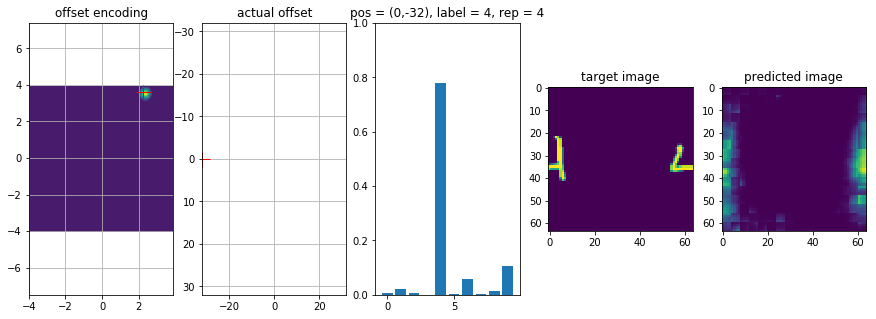

torch.Size([50, 1, 28, 28])
0 -28
[[-0.82160812  4.10817802]] [[-0.79517871  4.12950789]]


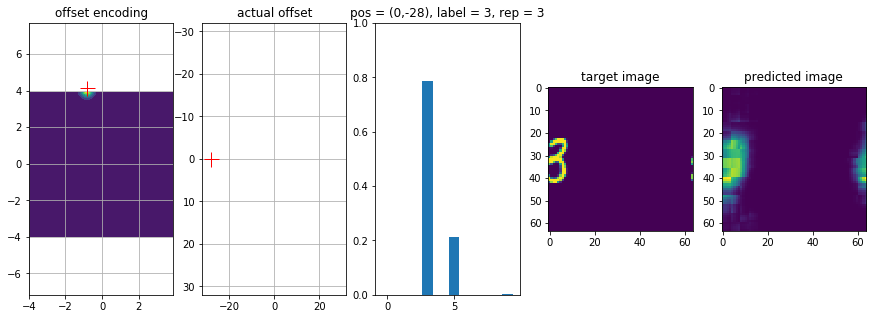

torch.Size([50, 1, 28, 28])
0 -24
[[-1.55157867  2.6283912 ]] [[-1.60975783  2.70345554]]


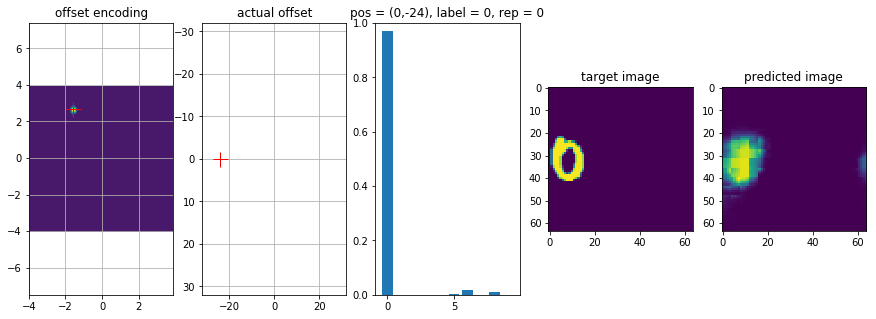

torch.Size([50, 1, 28, 28])
0 -20
[[-1.42455477  2.25638084]] [[-1.32931138  2.14538723]]


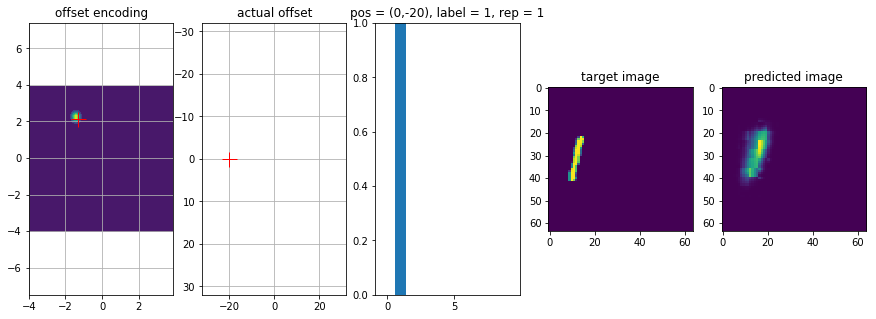

torch.Size([50, 1, 28, 28])
0 -16
[[-1.38084478  1.26057935]] [[-1.26621065  1.31981563]]


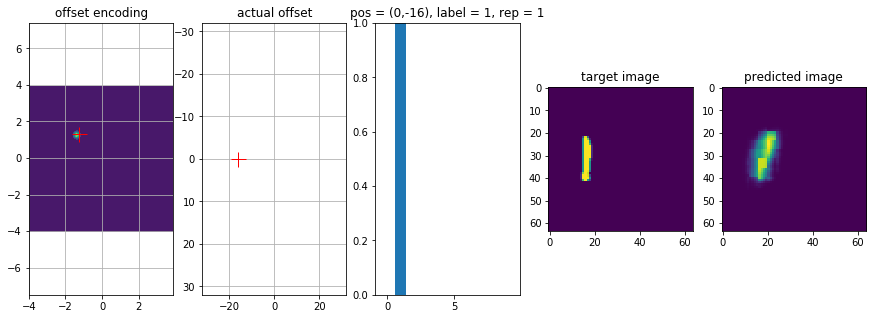

torch.Size([50, 1, 28, 28])
0 -12
[[-1.07596085  0.61156721]] [[-1.14529143  0.72918376]]


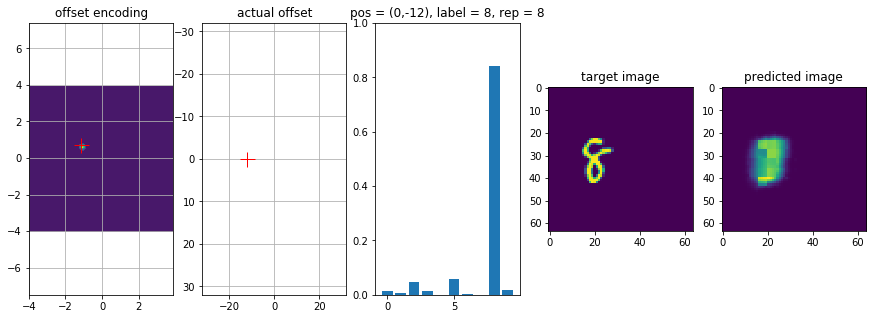

torch.Size([50, 1, 28, 28])
0 -8
[[-0.8346742   0.61341796]] [[-0.91800488  0.69889883]]


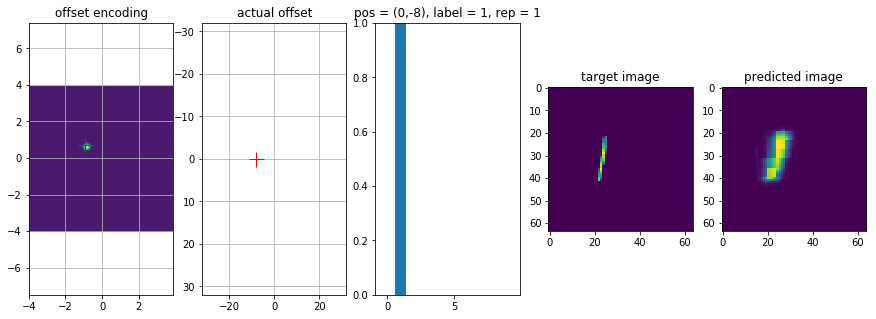

torch.Size([50, 1, 28, 28])
0 -4
[[-0.57845407  0.16139318]] [[-0.5652989   0.10026252]]


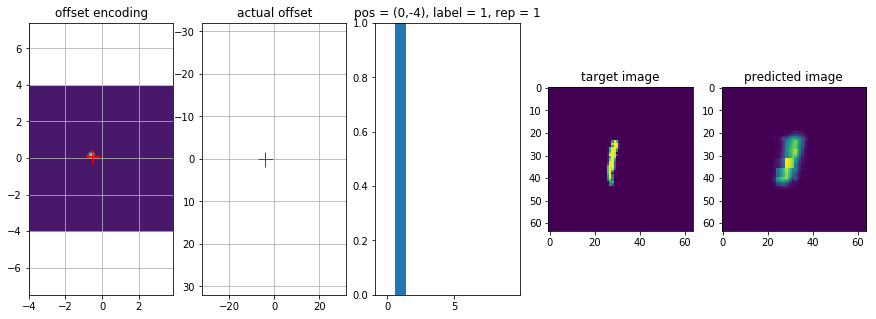

torch.Size([50, 1, 28, 28])
0 0
[[-0.14683982 -0.14569566]] [[-0.27963071 -0.11491978]]


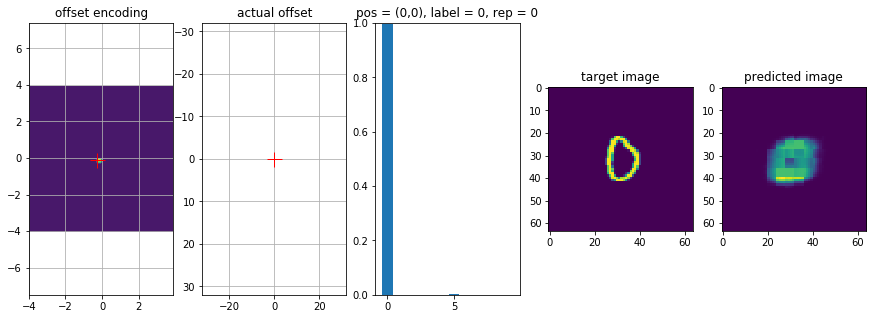

torch.Size([50, 1, 28, 28])
0 4
[[ 0.20496211 -0.38227838]] [[ 0.24897744 -0.31463012]]


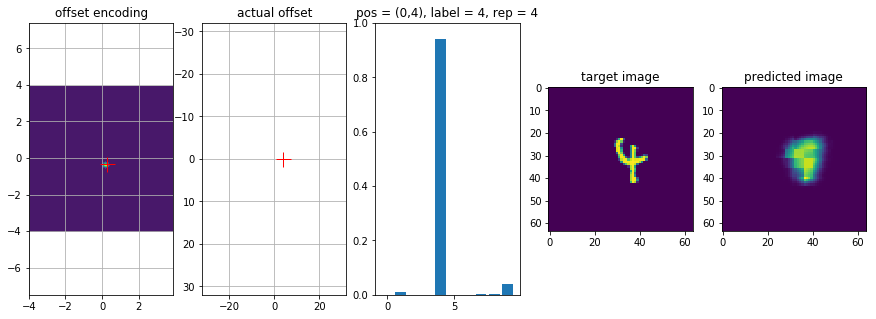

torch.Size([50, 1, 28, 28])
0 8
[[ 0.64566491 -0.70355065]] [[ 0.63330427 -0.74491957]]


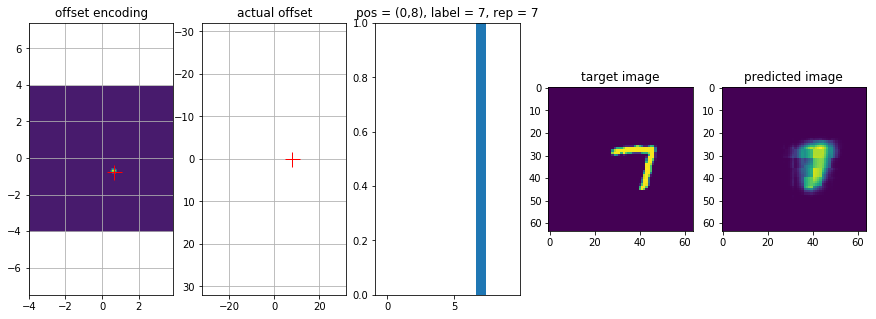

torch.Size([50, 1, 28, 28])
0 12
[[ 1.10864574 -0.42132116]] [[ 1.01387633 -0.39292347]]


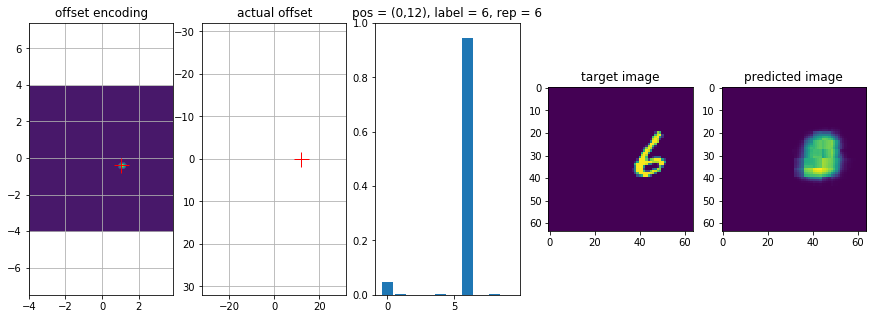

torch.Size([50, 1, 28, 28])
0 16
[[ 1.46243651 -0.50631386]] [[ 1.41764634 -0.46831852]]


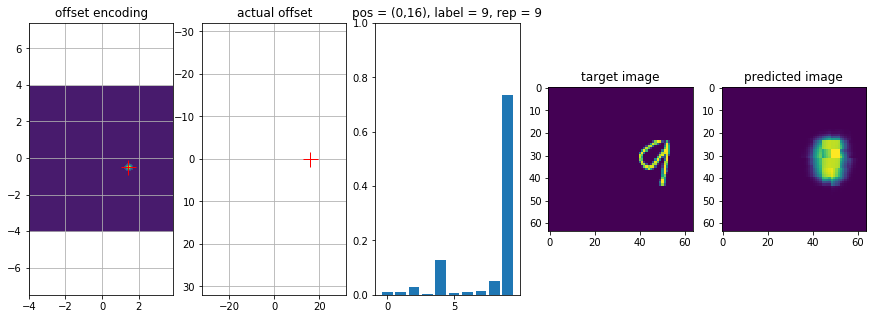

torch.Size([50, 1, 28, 28])
0 20
[[ 2.12647512 -0.52720754]] [[ 2.24828382 -0.58789905]]


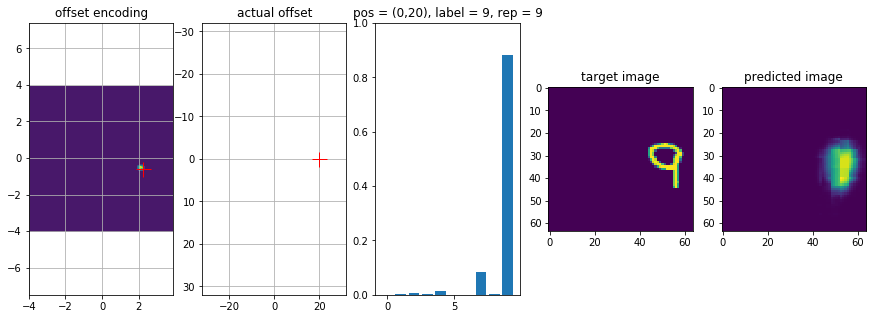

torch.Size([50, 1, 28, 28])
0 24
[[ 2.6219738  -0.08112684]] [[ 2.65849915 -0.32322972]]


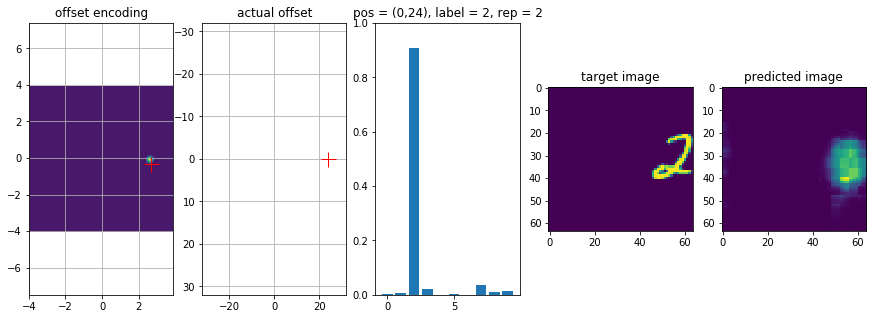

torch.Size([50, 1, 28, 28])
0 28
[[ 3.52428157  0.03461907]] [[ 3.47002981 -0.12708382]]


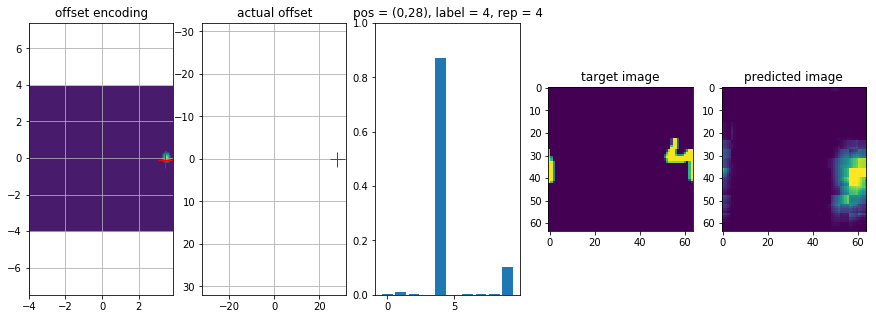

In [16]:
%matplotlib inline
import torch

from Where_act_code_VAE_classif_alt import couples_gen
from scipy.stats import multivariate_normal

import numpy as np
import torch.nn.functional as F


N_test = 10

for _ in range(-32,32,4): #range(N_test):
    '''i_offset = np.random.randint(args.size)
    j_offset = np.random.randint(args.size)'''
#     mid = np.int(ml.args.size / 2)
#     draw = np.random.multivariate_normal((0,0),((1,0),(0,1)))
#     i_offset = min(max(-mid, np.int(draw[0] * mid / 3)), mid)
#     j_offset = min(max(-mid, np.int(draw[1] * mid / 3)), mid)
    data, label = next(iter(ml.dataset.data_loader))
    print (data.shape)  
    idx = 0
    #label[idx] = 0
    i_offset = 0
    j_offset = _
    print(i_offset, j_offset)
    data_full, label_full, pos_full = couples_gen(data[idx, 0, :, :], label[idx], i_offset, j_offset, size=args.size, contrast=1.)
    label_full = np.array(label_full, dtype = 'double')
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1, 5, figsize=((15, 5)))
    #ax[0].imshow(a_data)
    ax[3].imshow(data_full)
    ax[3].set_title('target image')
   
    x_hat_logit_output, mu_output, logvar_output, u_output, z_hat_logit_output = ml.model(torch.from_numpy(data_full[None, None, :, :]), 
                                                                      torch.from_numpy(label_full[None, :]),
                                                                      torch.from_numpy(pos_full[None, :]))[:5]
    ax[4].imshow(F.sigmoid(x_hat_logit_output.view(64, 64)).detach().numpy())
    ax[4].set_title('predicted image')
    #ax[2].imshow(F.sigmoid(output[0, 0, :, :]).detach().numpy())
    #plt.title("("+str(i_offset)+","+str(j_offset)+"), label = "+str(label[idx].item()))
    #rep = torch.argmax(z_hat_logit_output).detach().numpy()

    #ig, ax = plt.subplots(1, 3, figsize=((13, 5)))
    #ax[0].plot(a_data)
    ax[1].plot(j_offset, i_offset, 'r+', ms = 15)
    ax[1].set_xlim([-32, 32])
    ax[1].set_ylim([32, -32])
    ax[1].xaxis.grid(True)
    ax[1].yaxis.grid(True)
    ax[1].set_title('actual offset')
    
    u_offset = u_output[:,:2].detach().numpy()
    mu_offset = mu_output[:,:2].detach().numpy()
    logvar_offset = logvar_output[:,:2].detach().numpy()
    DIM1 = 0
    DIM2 = 1
    axe_x, axe_y = np.mgrid[-4:4:.1, -4:4:.1]
    q = multivariate_normal(mu_offset[0], np.exp(logvar_offset[0]) * np.eye(2))
    pos = np.empty(axe_x.shape + (2,))
    pos[:, :, DIM1] = axe_x; pos[:, :, DIM2] = axe_y

    print(mu_offset, u_offset)
    ax[0].contourf(axe_x, axe_y, q.pdf(pos))
    ax[0].plot(u_offset[0][0], u_offset[0][1], 'r+', ms = 15)
    ax[0].xaxis.grid(True)
    ax[0].set_xlim([-4, 4])
    ax[0].set_ylim([-4, 4])
    ax[0].yaxis.grid(True)
    ax[0].set_title('offset encoding')    
    ax[0].axis('equal')
    
    '''ax[2].imshow(F.sigmoid(x_hat_logit_output.view(64, 64)).detach().numpy())
    ax[2].set_title('predicted image')'''
    rep = torch.argmax(z_hat_logit_output).detach().numpy()
    ax[2].bar(np.arange(10), F.softmax(z_hat_logit_output[0,:]).detach().numpy())
    ax[2].set_ylim([0,1])
    ax[2].set_title("pos = ("+str(i_offset)+","+str(j_offset)+"), label = "+str(label[idx].item())+', rep = '+str(rep))

    
    plt.show()    

Apres environ 100 epoques

tensor(8)
0 -20


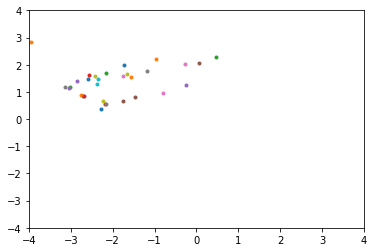

tensor(8)
0 -16


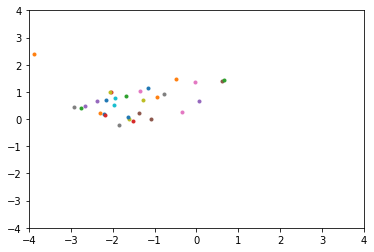

tensor(8)
0 -12


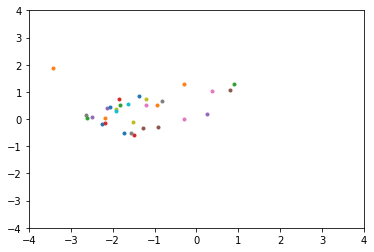

tensor(8)
0 -8


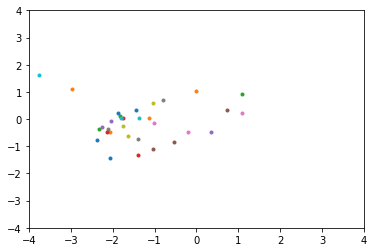

tensor(8)
0 -4


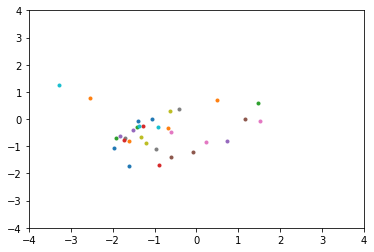

tensor(8)
0 0


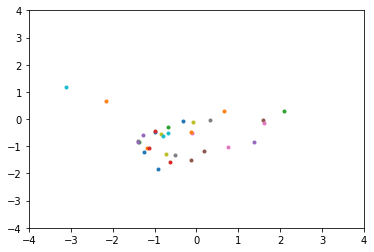

tensor(8)
0 4


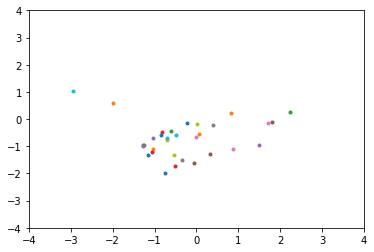

tensor(8)
0 8


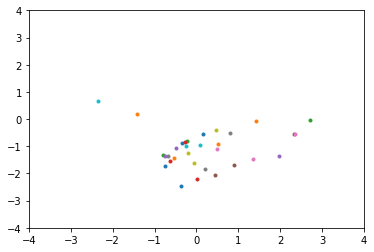

tensor(8)
0 12


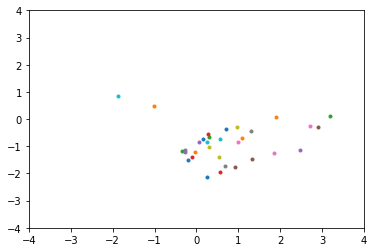

tensor(8)
0 16


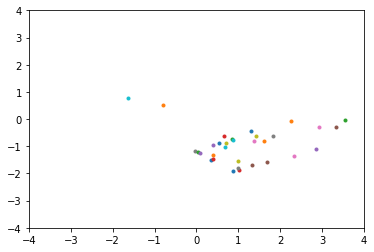

In [25]:
from Where_act_code_VAE_classif_alt import couples_gen
data, label = next(iter(ml.dataset.data_loader))
idx = 0
for _ in range(-20,20,4):
    #label[idx] = z
    idx = 3
    print(label[idx])
    i_offset = 0
    j_offset = _ 
    print(i_offset, j_offset)
    data_full, label_full, pos_full = couples_gen(data[idx, 0, :, :], label[idx], i_offset, j_offset, size=args.size, contrast=1.)
    label_full = np.array(label_full, dtype = 'double')
    x, d1, d2 = ml.model(torch.from_numpy(data_full[None, None, :, :]), 
                        torch.from_numpy(label_full[None, :]),
                        torch.from_numpy(pos_full[None, :]))[4:]
    plt.plot(d1.detach().numpy(),d2.detach().numpy(),'.')
    plt.xlim([-4, 4])
    plt.ylim([-4, 4])
    plt.show()



In [ ]:
_ = plt.plot(data_full)

In [ ]:
size = 256
grid_x, grid_y = np.abs(np.mgrid[-size/2:size/2, -size/2:size/2]) * 8 / size
pos = np.empty((size, size, 2))
pos[:, :, 0] = grid_x; pos[:, :, 1] = grid_y
d = multivariate_normal([0, 0], [[1, 0], [0, 1]])
mask = d.pdf(pos)
mask2 = np.exp(-20 * mask)
_ = plt.imshow(mask2)

In [ ]:
np.random.randn(5)

In [ ]:
output = ml.model(torch.from_numpy(data_full[None, None, :, :]))#.double())
output.shape

In [ ]:
output = torch.from_numpy(data_full[None, None, :, :].astype(np.float))
output.shape

In [ ]:
output = ml.model(torch.from_numpy(data_full[None, None, :, :])).detach().numpy()[0, 0, :, :]
output.shape

In [ ]:
output.min(), output.max()

In [ ]:
_ = plt.plot(a_data)

In [ ]:
draw = np.random.multivariate_normal((0,0),((1,0),(0,1)))

In [ ]:
plt.plot(ml.model.deconv1.bias.detach().numpy())

In [ ]:
plt.plot((1 + np.tanh(ml.model.fc4.bias.detach().numpy()))/2)

In [ ]:
plt.imshow(np.reshape(ml.model.fc4.bias.detach().numpy(),(64,64)))

In [ ]:
data, foo = next(iter(ml.dataset.data_loader))

In [ ]:
foo

In [ ]:
target_full = np.zeros(10, dtype = 'int')

In [ ]:
target_full

In [ ]:
loss_u = torch.zeros(1)

In [ ]:
torch.distributions.multinomial.Multinomial(